In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')  # Ìè∞Ìä∏ Ïù¥Î¶Ñ (MacOS ÏòàÏãú)

import warnings# Í≤ΩÍ≥† Î©îÏãúÏßÄ Î¨¥Ïãú

Text(0.5, 1.0, 'Í∞ÄÎÇòÎã§')

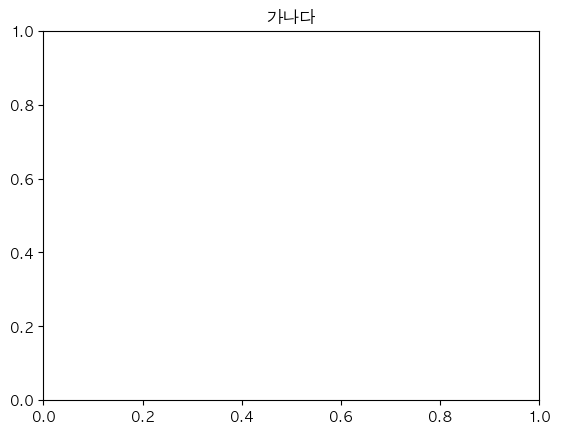

# ÎßÅÌÅ¨

In [68]:
# # Ï†úÎ™© 
import pandas as pd
def get_title():
    data = []
    posts = driver.find_elements(By.CSS_SELECTOR, 'a.click_search_result_item')
    for post in posts:
        a = post.get_attribute('data-title')
        data.append(a)
    data = pd.DataFrame(data)
    data.columns= ['title']
    return data

data = get_title()
data

NameError: name 'driver' is not defined

In [ ]:
# ÎÇ¥Ïö© 

def get_article():
    article = []
    articles = driver.find_elements(By.CSS_SELECTOR,'p._588sy4192')
    for i in articles:
        article.append(i.text)
    article = pd.DataFrame(article)
    data['article']= article
    return data

get_article()
data


In [ ]:
# Îèô 
etc = []
def get_etc():
    dongs = driver.find_elements(By.CSS_SELECTOR,
                             'span._588sy418w._588sy4195._588sy41w._588sy41aw._588sy41b5._588sy42')
    for i in dongs:
        etc.append(i.text)      
    abcd = pd.DataFrame(etc)
    data['etc'] = abcd.iloc[0::3].reset_index(drop=True)
    return data

get_etc()

In [ ]:
from datetime import datetime 
def get_time():
    times =[]
    time = driver.find_elements(By.CSS_SELECTOR,
                                'time._588sy418w._588sy4195._588sy41w._588sy41aw._588sy41b5._588sy42')
    for i in time:
        times.append(i.text)
    times = pd.DataFrame(times)
    data['time'] = times
    data['current_time'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    return data

get_time()   

In [ ]:
# Ï¢ãÏïÑÏöî / ÎåìÍ∏Ä
import pandas as pd
import re 

def get_like_comment():
    sample = []
    like = driver.find_elements(By.CSS_SELECTOR,
                                    'span._588sy4192._588sy41w._588sy41b2._588sy42')
    for i in like:
        sample.append(i.text)        
    sample = pd.DataFrame(sample)   
    likes = sample.iloc[0::2].reset_index(drop=True)
    comments = sample.iloc[1::2].reset_index(drop=True)
    data['like'] = likes
    data['comment'] = comments
    return data

get_like_comment()

In [72]:


def get_title(driver):
    posts = driver.find_elements(By.CSS_SELECTOR, 'a.click_search_result_item')
    titles = [post.get_attribute('data-title') for post in posts]
    return pd.DataFrame({"title": titles})

def get_article(driver):
    articles = driver.find_elements(By.CSS_SELECTOR, 'p._588sy4192')
    article_texts = [article.text for article in articles]
    return pd.DataFrame({"article": article_texts})

def get_etc(driver):
    dongs = driver.find_elements(By.CSS_SELECTOR,
                                 'span._588sy418w._588sy4195._588sy41w._588sy41aw._588sy41b5._588sy42')
    dong_texts = [dong.text for dong in dongs]
    etc_data = pd.DataFrame({"etc": dong_texts[0::3]}).reset_index(drop=True)  # 3Í∞úÏî© Ï§ë Ï≤´ Î≤àÏß∏
    return etc_data

def get_time(driver):
    times = driver.find_elements(By.CSS_SELECTOR,
                                 'time._588sy418w._588sy4195._588sy41w._588sy41aw._588sy41b5._588sy42')
    time_texts = [time.text for time in times]
    current_time = [datetime.now().strftime('%Y-%m-%d %H:%M:%S')] * len(time_texts)
    return pd.DataFrame({"time": time_texts, "current_time": current_time})

def get_like_comment(driver):
    like_comments = driver.find_elements(By.CSS_SELECTOR, 'span._588sy4192._588sy41w._588sy41b2._588sy42')
    texts = [lc.text for lc in like_comments if 'Ï¢ãÏïÑÏöî' in lc.text or 'ÎåìÍ∏Ä' in lc.text]  # ÌïÑÌÑ∞ÎßÅ
    likes = texts[0::2]  # Ï¢ãÏïÑÏöî
    comments = texts[1::2]  # ÎåìÍ∏Ä
    return pd.DataFrame({"like": likes, "comment": comments})

def crawl(driver):
    title_data = get_title(driver)
    article_data = get_article(driver)
    etc_data = get_etc(driver)
    time_data = get_time(driver)
    like_comment_data = get_like_comment(driver)

    # DataFrame Î≥ëÌï©
    data = pd.concat([title_data, article_data, etc_data, time_data, like_comment_data], axis=1)
    return data

def click_load_more(driver, max_clicks=2, wait_time=2):
    """
    ÎçîÎ≥¥Í∏∞ Î≤ÑÌäºÏùÑ Î∞òÎ≥µÏ†ÅÏúºÎ°ú ÌÅ¥Î¶≠ÌïòÎäî Ìï®Ïàò.
    """
    click_count = 0
    while click_count < max_clicks:
        try:
            more_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, 'button._876es70._876es75._876es73._588sy462._588sy4r8'))
            )
            more_button.click()
            click_count += 1
            print(f"{click_count}Î≤àÏß∏ ÎçîÎ≥¥Í∏∞ Î≤ÑÌäº ÌÅ¥Î¶≠ ÏÑ±Í≥µ")
            time.sleep(wait_time)  # Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÎåÄÍ∏∞
        except Exception as e:
            print(f"Îçî Ïù¥ÏÉÅ ÎçîÎ≥¥Í∏∞ Î≤ÑÌäºÏù¥ ÏóÜÍ±∞ÎÇò Ïò§Î•ò Î∞úÏÉù: {e}")
            break


def crawl_district(driver, url, district_name, max_clicks=3):
    """
    ÌäπÏ†ï Íµ¨ Îç∞Ïù¥ÌÑ∞Î•º ÌÅ¨Î°§ÎßÅÌïòÎäî Ìï®Ïàò.
    """
    driver.get(url)
    time.sleep(3)

    # ÎçîÎ≥¥Í∏∞ Î≤ÑÌäº ÌÅ¥Î¶≠
    click_load_more(driver, max_clicks=max_clicks)

    # Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
    title_data = get_title(driver)
    article_data = get_article(driver)
    etc_data = get_etc(driver)
    time_data = get_time(driver)
    like_comment_data = get_like_comment(driver)

    # Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
    district_data = pd.concat([title_data, article_data, etc_data, time_data, like_comment_data], axis=1)
    district_data["district"] = district_name  # Íµ¨ Ïù¥Î¶Ñ Ï∂îÍ∞Ä

    return district_data

def crawl_all_districts(driver, district_urls, max_clicks=3):
    """
    Î™®Îì† Íµ¨ Îç∞Ïù¥ÌÑ∞Î•º ÌÅ¨Î°§ÎßÅÌïòÎäî Ìï®Ïàò.
    """
    all_data = pd.DataFrame()

    for district_name, url in district_urls.items():
        print(f"ÌòÑÏû¨ Íµ¨: {district_name}")
        try:
            district_data = crawl_district(driver, url, district_name, max_clicks=max_clicks)
            all_data = pd.concat([all_data, district_data], ignore_index=True)
            print(f"{district_name}: {len(district_data)}Í∞úÏùò Îç∞Ïù¥ÌÑ∞ ÏàòÏßë ÏôÑÎ£å")
        except Exception as e:
            print(f"{district_name}: ÌÅ¨Î°§ÎßÅ Ï§ë Ïò§Î•ò Î∞úÏÉù - {e}")

    return all_data



# ÏÑúÏö∏Ïãú Ï†ÑÏ≤¥ ÌÅ¨Î°§ÎßÅ

In [195]:
# Íµ¨Î≥Ñ URL
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

district_urls = {
    "Ï¢ÖÎ°úÍµ¨": "https://www.daangn.com/kr/community/?in=Ï¢ÖÎ°úÍµ¨-2",
    "Ï§ëÍµ¨": 'https://www.daangn.com/kr/community/?in=Ï§ëÍµ¨-20',
    "Ïö©ÏÇ∞Íµ¨": 'https://www.daangn.com/kr/community/?in=Ïö©ÏÇ∞Íµ¨-36',
    "ÏÑ±ÎèôÍµ¨": 'https://www.daangn.com/kr/community/?in=ÏÑ±ÎèôÍµ¨-53',
    "Í¥ëÏßÑÍµ¨": 'https://www.daangn.com/kr/community/?in=Í¥ëÏßÑÍµ¨-71',
    "ÎèôÎåÄÎ¨∏Íµ¨": 'https://www.daangn.com/kr/community/?in=ÎèôÎåÄÎ¨∏Íµ¨-87',
    "Ï§ëÎûëÍµ¨": 'https://www.daangn.com/kr/community/?in=Ï§ëÎûëÍµ¨-102',
    "ÏÑ±Î∂ÅÍµ¨": 'https://www.daangn.com/kr/community/?in=ÏÑ±Î∂ÅÍµ¨-119',
    "Í∞ïÎ∂ÅÍµ¨": 'https://www.daangn.com/kr/community/?in=Í∞ïÎ∂ÅÍµ¨-140',
    "ÎèÑÎ¥âÍµ¨": 'https://www.daangn.com/kr/community/?in=ÎèÑÎ¥âÍµ¨-154',
    "ÎÖ∏ÏõêÍµ¨": 'https://www.daangn.com/kr/community/?in=ÎÖ∏ÏõêÍµ¨-169',
    "ÏùÄÌèâÍµ¨": 'https://www.daangn.com/kr/community/?in=ÏùÄÌèâÍµ¨-189',
    "ÏÑúÎåÄÎ¨∏Íµ¨": 'https://www.daangn.com/kr/community/?in=ÏÑúÎåÄÎ¨∏Íµ¨-206',
    "ÎßàÌè¨Íµ¨": "https://www.daangn.com/kr/community/?in=ÎßàÌè¨Íµ¨-221",
    "ÏñëÏ≤úÍµ¨": "https://www.daangn.com/kr/community/?in=ÏñëÏ≤úÍµ¨-238",
    "Í∞ïÏÑúÍµ¨": "https://www.daangn.com/kr/community/?in=Í∞ïÏÑúÍµ¨-257",
    "Íµ¨Î°úÍµ¨": "https://www.daangn.com/kr/community/?in=Íµ¨Î°úÍµ¨-278",
    "Í∏àÏ≤úÍµ¨": "https://www.daangn.com/kr/community/?in=Í∏àÏ≤úÍµ¨-294",
    "ÏòÅÎì±Ìè¨Íµ¨": "https://www.daangn.com/kr/community/?in=ÏòÅÎì±Ìè¨Íµ¨-305",
    "ÎèôÏûëÍµ¨": "https://www.daangn.com/kr/community/?in=ÎèôÏûëÍµ¨-324",
    "Í¥ÄÏïÖÍµ¨": "https://www.daangn.com/kr/community/?in=Í¥ÄÏïÖÍµ¨-340",
    "ÏÑúÏ¥àÍµ¨": "https://www.daangn.com/kr/community/?in=ÏÑúÏ¥àÍµ¨-362",
    "Í∞ïÎÇ®Íµ¨": "https://www.daangn.com/kr/community/?in=Í∞ïÎÇ®Íµ¨-381",
    "ÏÜ°ÌååÍµ¨": "https://www.daangn.com/kr/community/?in=ÏÜ°ÌååÍµ¨-404",
    "Í∞ïÎèôÍµ¨": "https://www.daangn.com/kr/community/?in=Í∞ïÎèôÍµ¨-432"
}

# ÌÅ¨Î°¨ ÎìúÎùºÏù¥Î≤Ñ Ïã§Ìñâ
driver = webdriver.Chrome()

data = crawl_all_districts(driver, district_urls, max_clicks=3)


ÌòÑÏû¨ Íµ¨: Ï¢ÖÎ°úÍµ¨
1Î≤àÏß∏ ÎçîÎ≥¥Í∏∞ Î≤ÑÌäº ÌÅ¥Î¶≠ ÏÑ±Í≥µ
Îçî Ïù¥ÏÉÅ ÎçîÎ≥¥Í∏∞ Î≤ÑÌäºÏù¥ ÏóÜÍ±∞ÎÇò Ïò§Î•ò Î∞úÏÉù: Message: 
Stacktrace:
0   chromedriver                        0x000000010144bac4 cxxbridge1$str$ptr + 3651580
1   chromedriver                        0x0000000101444314 cxxbridge1$str$ptr + 3620940
2   chromedriver                        0x0000000100eac4b4 cxxbridge1$string$len + 89224
3   chromedriver                        0x0000000100ef0898 cxxbridge1$string$len + 368748
4   chromedriver                        0x0000000100f2a0fc cxxbridge1$string$len + 604368
5   chromedriver                        0x0000000100ee50b0 cxxbridge1$string$len + 321668
6   chromedriver                        0x0000000100ee5d00 cxxbridge1$string$len + 324820
7   chromedriver                        0x0000000101416e08 cxxbridge1$str$ptr + 3435328
8   chromedriver                        0x000000010141a120 cxxbridge1$str$ptr + 3448408
9   chromedriver                        0x00000001013fe17c c

# Î∂ÑÏÑù

In [207]:
import pandas as pd
data = pd.read_csv('crawling_11_27_16:41.csv')
data2 = pd.read_csv('crawling_12_28_01_02.csv')
data3 = pd.read_csv('crawling_11_28_09_20.csv')

data_concat = pd.concat([data, data2,data3], ignore_index=True)
data_concat

title  \
0                              Ï≤´Îàà   
1                    ÌîºÌÅ¨ÎØº Í∏∏ ÏÑúÏπò Îàà ÎπÑ   
2                          ÎààÏò§Î¶¨ Ï∂úÎ™∞   
3     421Î≤à Î≤ÑÏä§ Ïò§Ï†Ñ 9Ïãú Î∞òÏØ§ ÏóêÏñ¥Ìåü 3ÏÑ∏ÎåÄ Î∂ÑÏã§   
4       Í¥ëÌôîÎ¨∏ Í∑ºÏ≤òÏóêÏÑú Î£®Ïù¥ÎπÑÌÜµ Ïπ¥Îìú ÏßÄÍ∞ë Ï£ºÏö∞Ïã†Î∂Ñ!   
...                           ...   
7495       Í∞ôÏù¥ Í¥ëÎÇòÎ£® ÌïúÍ∞ïÍ≥µÏõê Ïû•Í±∞Î¶¨ Îü¨Îãù ÌïòÏã§Î∂Ñ   
7496   Í∞ïÎèô ÎÜçÌòëÏÇ¨Í±∞Î¶¨ Ïã†Ìò∏Îì± ÏÉùÍ∏∞Í≥† ÎÑàÎ¨¥ ÎßâÌûàÎÑ§Ïöî..   
7497                      ÎëîÏ¥åÏãúÏû•Î∂ïÏñ¥Îπµ   
7498               Í≥ºÏô∏Îäî Ïñ¥ÎîîÏÑú Íµ¨ÌïòÏãúÎÇòÏöî?   
7499      Ïò§Îäò  Ïò∑Ï†ïÎ¶¨ Î∞èÏ£ºÎ≥Ä Ï†ïÎ¶¨ ÎèÑÏôÄ Ï£ºÏã§Î∂Ñ     

                                                article  \
0                         Ï≤´Îàà Ìï®Î∞ïÎààÏù¥ Ìéë Ìéë ÎÇ¥Î¶¨Í≥† ÏûàÎÑ§Ïöî Í≤ΩÏπò ÎÅùÎÇ¥ Ï£ºÎÑ§Ïöî   
1     ÌîºÌÅ¨ÎØº Í∏∏Îßå ÏÑúÏπòÎêòÎäî Í≥≥ ÏïÑÏã§ÍπåÏöî?? Îàà, ÎπÑ ÌîºÌÅ¨ÎØº Î™®ÏúºÍ≥† Ïã∂ÏùÄÎç∞„Öú„Ö† ÎèåÏïÑÎã§ÎÖÄÎ¥êÎèÑ...   
2     ÎÑ§ Ï†úÍ∞Ä ÎßåÎì§Ïñ¥ÎëêÏóàÏñ¥Ïöî „Öã„Öã„Öã ÏïÑÏπ®Ïóê ÎààÏôîÎã§Í≥†, Í∏∞ÎªêÌïòÎ©∞ ÎààÏò§Î¶¨ ÏßëÍ≤å Ï±ôÍ≤®ÏÑú Ï∂úÍ∑ºÌïò...   
3     421Î≤à Ïò§Ï†Ñ 9Ïãú20Î∂ÑÏóêÏÑú ~10Ïãú ÏÇ¨Ïù¥Ïóê Ïã†ÏÑ§Îèô - Ï∂©Î¨¥Î°ú - Ïö©ÏÇ∞ÏØ§ Î≤ÑÏä§ ÌÉÄÏã†...   
4     Î£®Ïù¥ÎπÑÌÜµ Ïπ¥ÎìúÏßÄÍ∞ë Ï£ºÏö∞Ïã† Î∂Ñ Í≥ÑÏã§ÍπåÏöî? Î∞úÍ≤¨ÌïòÏãúÎ©¥ ÎåìÍ∏Ä Ï¢Ä Îã¨ÏïÑÏ£ºÏÑ∏Ïöî üò≠üò≠üò≠ Ïò§ÎûòÏì∞...   
...                                                 ...   
7495  25~30km ÌéòÏù¥Ïä§Îäî 600~630ÏúºÎ°ú ÏãúÏûëÌï¥ÏÑú 500Ï†ïÎèÑÍπåÏßÄ ÎπåÎìúÏóÖÏúºÎ°ú Îõ∞Í≥† Ïã∂...   
7496  Í∞ëÏûêÍ∏∞ Ïã†Ìò∏Îì± ÏÉùÍ∏∞Î©¥ÏÑú ÌïúÎ≤à Ïö∞ÌöåÏ†ÑÌïòÎ†§Î©¥ Ïã†Ìò∏ 2~3Í∞úÎäî ÏßÄÎÇòÏïº Í≤®Ïö∞ ÏßÄÎÇòÍ∞ÄÍ≥† Ï≤úÌò∏...   
7497            Ïò§ÎûúÎßåÏóê„Ö£ÎëîÏ¥åÏãúÏû• Í∞îÎäîÎç∞ Î∂ïÏñ¥ÎπµÏù¥ ÏÉùÍ≤ºÏñ¥Ïöî ÎßõÏûàÎäîÏßÄ Í∂ÅÍ∏àÌï¥ÏÑú ÏÇ¨ÏôÄÎ¥§Ïñ¥Ïöî   
7498  ÏïàÎÖïÌïòÏÑ∏Ïöî~! ÌòÑÏû¨ ÎåÄÏπòÎèôÏóêÏÑú Ï§ëÎì±ÏàòÌïôÏùÑ Îß°Í≥† ÏûàÎäî ÌïôÏõê Í∞ïÏÇ¨ÏûÖÎãàÎã§. Í∑∏ÎèôÏïà ÎÑàÎ¨¥ ...   
7499        ÏúÑÏπòÎäî Ï≤úÌò∏Îèô Ïù¥Î©∞ ÏãúÍ∞ÑÎãπ 3Îßå ÎìúÎ¶¨Í≤†ÏäµÎãàÎã§ Ïò∑Ï†ïÎ¶¨ ÏûòÌï¥Ï£ºÏã§Î∂Ñ Ï∞æÏäµÎãàÎã§~~^^   

                                    etc     time         current_time  \
0              Ï≤¥Î∂ÄÎèô\n¬∑\nÎèôÎÑ§ÌíçÍ≤Ω\n¬∑\nÏïΩ 4ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 4ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
1                Ïà≠Ïù∏Îèô\n¬∑\nÏ∑®ÎØ∏\n¬∑\nÏïΩ 4ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 4ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
2               Ï¢ÖÎ°ú1Í∞Ä\n¬∑\nÏ∑®ÎØ∏\n¬∑\nÏïΩ 5ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 5ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
3           Ïà≠Ïù∏Ï†ú2Îèô\n¬∑\nÎ∂ÑÏã§/Ïã§Ï¢Ö\n¬∑\nÏïΩ 6ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 6ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
4     Ï¢ÖÎ°ú1.2.3.4Í∞ÄÎèô\n¬∑\nÎ∂ÑÏã§/Ïã§Ï¢Ö\n¬∑\nÏïΩ 6ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 6ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
...                                 ...      ...                  ...   
7495              Ï≤úÌò∏Ï†ú3Îèô\n¬∑\nÏö¥Îèô\n¬∑\n2Ïùº Ï†Ñ     2Ïùº Ï†Ñ  2024-11-28 09:16:19   
7496          Ï≤úÌò∏Ï†ú3Îèô\n¬∑\nÏ£ºÍ±∞/Î∂ÄÎèôÏÇ∞\n¬∑\n2Ïùº Ï†Ñ     2Ïùº Ï†Ñ  2024-11-28 09:16:19   
7497                ÏÑ±ÎÇ¥Îèô\n¬∑\nÎßõÏßë\n¬∑\n2Ïùº Ï†Ñ     2Ïùº Ï†Ñ  2024-11-28 09:16:19   
7498                ÎëîÏ¥åÎèô\n¬∑\nÍµêÏú°\n¬∑\n2Ïùº Ï†Ñ     2Ïùº Ï†Ñ  2024-11-28 09:16:19   
7499             Ï≤úÌò∏Îèô\n¬∑\nÏÉùÌôú/Ìé∏Ïùò\n¬∑\n2Ïùº Ï†Ñ     2Ïùº Ï†Ñ  2024-11-28 09:16:19   

          like  comment district  
0     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
1     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
2     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
3     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
4     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
...        ...      ...      ...  
7495  Ï¢ãÏïÑÏöî Ïàò\n1  ÎåìÍ∏Ä Ïàò\n2      Í∞ïÎèôÍµ¨  
7496  Ï¢ãÏïÑÏöî Ïàò\n3  ÎåìÍ∏Ä Ïàò\n7      Í∞ïÎèôÍµ¨  
7497  Ï¢ãÏïÑÏöî Ïàò\n2  ÎåìÍ∏Ä Ïàò\n1      Í∞ïÎèôÍµ¨  
7498  Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Í∞ïÎèôÍµ¨  
7499  Ï¢ãÏïÑÏöî Ïàò\n1  ÎåìÍ∏Ä Ïàò\n5      Í∞ïÎèôÍµ¨  

[7500 rows x 8 columns]

In [208]:
analysis = data_concat.copy()

In [206]:
analysis

title  \
0                              Ï≤´Îàà   
1                    ÌîºÌÅ¨ÎØº Í∏∏ ÏÑúÏπò Îàà ÎπÑ   
2                          ÎààÏò§Î¶¨ Ï∂úÎ™∞   
3     421Î≤à Î≤ÑÏä§ Ïò§Ï†Ñ 9Ïãú Î∞òÏØ§ ÏóêÏñ¥Ìåü 3ÏÑ∏ÎåÄ Î∂ÑÏã§   
4       Í¥ëÌôîÎ¨∏ Í∑ºÏ≤òÏóêÏÑú Î£®Ïù¥ÎπÑÌÜµ Ïπ¥Îìú ÏßÄÍ∞ë Ï£ºÏö∞Ïã†Î∂Ñ!   
...                           ...   
3548                           Ï≤´Îàà   
3549                Ìï∏ÎìúÌè∞ Í∞§Îü≠Ïãú ÌîåÎ¶Ω Î∂ÑÏã§   
3550       5Ìò∏ÌÉùÎ∞∞ÏÇ¨Ïù¥Ï¶à Î∞ïÏä§ ÌïòÎÇòÎßåÏñªÏùÑÏàòÏûàÏùÑÍπåÏöî?   
3551                  ÏÑúÏö∏ ÏÉÅÍ≤Ω 3Í∞úÏõîÏ∞®    
3552                         Îß§Ìä∏Î¶≠Ïä§   

                                                article  \
0                         Ï≤´Îàà Ìï®Î∞ïÎààÏù¥ Ìéë Ìéë ÎÇ¥Î¶¨Í≥† ÏûàÎÑ§Ïöî Í≤ΩÏπò ÎÅùÎÇ¥ Ï£ºÎÑ§Ïöî   
1     ÌîºÌÅ¨ÎØº Í∏∏Îßå ÏÑúÏπòÎêòÎäî Í≥≥ ÏïÑÏã§ÍπåÏöî?? Îàà, ÎπÑ ÌîºÌÅ¨ÎØº Î™®ÏúºÍ≥† Ïã∂ÏùÄÎç∞„Öú„Ö† ÎèåÏïÑÎã§ÎÖÄÎ¥êÎèÑ...   
2     ÎÑ§ Ï†úÍ∞Ä ÎßåÎì§Ïñ¥ÎëêÏóàÏñ¥Ïöî „Öã„Öã„Öã ÏïÑÏπ®Ïóê ÎààÏôîÎã§Í≥†, Í∏∞ÎªêÌïòÎ©∞ ÎààÏò§Î¶¨ ÏßëÍ≤å Ï±ôÍ≤®ÏÑú Ï∂úÍ∑ºÌïò...   
3     421Î≤à Ïò§Ï†Ñ 9Ïãú20Î∂ÑÏóêÏÑú ~10Ïãú ÏÇ¨Ïù¥Ïóê Ïã†ÏÑ§Îèô - Ï∂©Î¨¥Î°ú - Ïö©ÏÇ∞ÏØ§ Î≤ÑÏä§ ÌÉÄÏã†...   
4     Î£®Ïù¥ÎπÑÌÜµ Ïπ¥ÎìúÏßÄÍ∞ë Ï£ºÏö∞Ïã† Î∂Ñ Í≥ÑÏã§ÍπåÏöî? Î∞úÍ≤¨ÌïòÏãúÎ©¥ ÎåìÍ∏Ä Ï¢Ä Îã¨ÏïÑÏ£ºÏÑ∏Ïöî üò≠üò≠üò≠ Ïò§ÎûòÏì∞...   
...                                                 ...   
3548                  Ï≤´ÎààÏôÄÏÑú ÎßåÎì§ÏóàÎäîÎç∞ Î≥¥Ïã§Î∂ÑÎì§ Î≥¥Í≥† Í∞ÄÏÑ∏Ïöî... Îã§Îì§ ÎààÍ∏∏Ï°∞Ïã¨   
3549  ÏÜ°Ìåå ÏÇ¨Í±∞Î¶¨ ÌîÑÎùºÏûÑ ÌîºÏãúÎ∞© Ïïû Ïã†Ìò∏Îì± Ï™Ω Ìë∏ÌÑ∞ Í∞§Îü≠Ïãú ÌîåÎ¶Ω 3 Î∂ÑÏã§ÌñàÏäµÎãàÎã§ Î≥¥Ïã† Î∂Ñ...   
3550  ÍµøÏúåÏóê Í∏∞Î∂ÄÌï¥ÏïºÎêòÎäî Ïò∑Îì§Ïù¥ ÏûàÎäîÎç∞ Î∞ïÏä§Í∞Ä ÏóÜÏñ¥ÏÑúÏöî..„Ö†„Ö† ÌõºÏÜêÎêòÏßÄÎßå ÏïäÏïòÎã§Î©¥ Ïò∑ 1...   
3551  ÎèôÎÑ§ÏπúÍµ¨ Íµ¨Ìï¥Ïó¨! Ïà† ÌîºÏãúÎ∞© ÎãπÍµ¨ ÎÖ∏ÎûòÎ∞© Îã§ Ï¢ãÏïÑÌï¥Ïöî ÏùºÎÅùÎÇòÍ≥† Í∞ÑÏà†Ï¢ãÏïÑÌïòÍ≥† ÏÇ¥Î©¥ÏÑú ...   
3552  Îß§Ìä∏Î¶≠Ïä§ Ïñ¥ÎñªÍ≤å Î≤ÑÎ†§ÏïºÎê†ÍπåÏöî? ÏûêÏ∑®ÏÉùÏù∏Îç∞ 3Í∞úÏõîÏ†ïÎèÑ Ïì¥Í±¥Îç∞ ÌïÑÏöîÏóÜÏñ¥ÏÑú Î≤ÑÎ¶¥ÎùºÍ≥† ÌïòÎäî...   

                                    etc     time         current_time  \
0              Ï≤¥Î∂ÄÎèô\n¬∑\nÎèôÎÑ§ÌíçÍ≤Ω\n¬∑\nÏïΩ 4ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 4ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
1                Ïà≠Ïù∏Îèô\n¬∑\nÏ∑®ÎØ∏\n¬∑\nÏïΩ 4ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 4ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
2               Ï¢ÖÎ°ú1Í∞Ä\n¬∑\nÏ∑®ÎØ∏\n¬∑\nÏïΩ 5ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 5ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
3           Ïà≠Ïù∏Ï†ú2Îèô\n¬∑\nÎ∂ÑÏã§/Ïã§Ï¢Ö\n¬∑\nÏïΩ 6ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 6ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
4     Ï¢ÖÎ°ú1.2.3.4Í∞ÄÎèô\n¬∑\nÎ∂ÑÏã§/Ïã§Ï¢Ö\n¬∑\nÏïΩ 6ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 6ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
...                                 ...      ...                  ...   
3548        Î∞©Ïù¥2Îèô\n¬∑\nÎèôÎÑ§ÏÇ¨Í±¥ÏÇ¨Í≥†\n¬∑\nÏïΩ 5ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 5ÏãúÍ∞Ñ Ï†Ñ  2024-11-28 09:15:58   
3549         ÏÜ°Ìåå1Îèô\n¬∑\nÎ∂ÑÏã§/Ïã§Ï¢Ö\n¬∑\nÏïΩ 7ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 7ÏãúÍ∞Ñ Ï†Ñ  2024-11-28 09:15:58   
3550             Ïû•ÏßÄÎèô\n¬∑\nÏùºÎ∞ò\n¬∑\nÏïΩ 7ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 7ÏãúÍ∞Ñ Ï†Ñ  2024-11-28 09:15:58   
3551          Î∞©Ïù¥2Îèô\n¬∑\nÎèôÎÑ§ÏπúÍµ¨\n¬∑\nÏïΩ 8ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 8ÏãúÍ∞Ñ Ï†Ñ  2024-11-28 09:15:58   
3552          ÏïîÏÇ¨Îèô\n¬∑\nÏÉùÌôú/Ìé∏Ïùò\n¬∑\nÏïΩ 9ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 9ÏãúÍ∞Ñ Ï†Ñ  2024-11-28 09:16:19   

          like  comment district  
0     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
1     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
2     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
3     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
4     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
...        ...      ...      ...  
3548  Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      ÏÜ°ÌååÍµ¨  
3549  Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      ÏÜ°ÌååÍµ¨  
3550  Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n1      ÏÜ°ÌååÍµ¨  
3551  Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      ÏÜ°ÌååÍµ¨  
3552  Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Í∞ïÎèôÍµ¨  

[3553 rows x 8 columns]

In [215]:
# Ï§ëÎ≥µÏ†úÍ±∞ 
duplicates = analysis.duplicated(subset=['title','article', 'district'])

idx = pd.DataFrame(duplicates).loc[duplicates==True].index

analysis = analysis.drop_duplicates(subset=['title','article'])

analysis.reset_index(drop=True, inplace=True)

In [216]:
analysis

title  \
0                              Ï≤´Îàà   
1                    ÌîºÌÅ¨ÎØº Í∏∏ ÏÑúÏπò Îàà ÎπÑ   
2                          ÎààÏò§Î¶¨ Ï∂úÎ™∞   
3     421Î≤à Î≤ÑÏä§ Ïò§Ï†Ñ 9Ïãú Î∞òÏØ§ ÏóêÏñ¥Ìåü 3ÏÑ∏ÎåÄ Î∂ÑÏã§   
4       Í¥ëÌôîÎ¨∏ Í∑ºÏ≤òÏóêÏÑú Î£®Ïù¥ÎπÑÌÜµ Ïπ¥Îìú ÏßÄÍ∞ë Ï£ºÏö∞Ïã†Î∂Ñ!   
...                           ...   
3548                           Ï≤´Îàà   
3549                Ìï∏ÎìúÌè∞ Í∞§Îü≠Ïãú ÌîåÎ¶Ω Î∂ÑÏã§   
3550       5Ìò∏ÌÉùÎ∞∞ÏÇ¨Ïù¥Ï¶à Î∞ïÏä§ ÌïòÎÇòÎßåÏñªÏùÑÏàòÏûàÏùÑÍπåÏöî?   
3551                  ÏÑúÏö∏ ÏÉÅÍ≤Ω 3Í∞úÏõîÏ∞®    
3552                         Îß§Ìä∏Î¶≠Ïä§   

                                                article  \
0                         Ï≤´Îàà Ìï®Î∞ïÎààÏù¥ Ìéë Ìéë ÎÇ¥Î¶¨Í≥† ÏûàÎÑ§Ïöî Í≤ΩÏπò ÎÅùÎÇ¥ Ï£ºÎÑ§Ïöî   
1     ÌîºÌÅ¨ÎØº Í∏∏Îßå ÏÑúÏπòÎêòÎäî Í≥≥ ÏïÑÏã§ÍπåÏöî?? Îàà, ÎπÑ ÌîºÌÅ¨ÎØº Î™®ÏúºÍ≥† Ïã∂ÏùÄÎç∞„Öú„Ö† ÎèåÏïÑÎã§ÎÖÄÎ¥êÎèÑ...   
2     ÎÑ§ Ï†úÍ∞Ä ÎßåÎì§Ïñ¥ÎëêÏóàÏñ¥Ïöî „Öã„Öã„Öã ÏïÑÏπ®Ïóê ÎààÏôîÎã§Í≥†, Í∏∞ÎªêÌïòÎ©∞ ÎààÏò§Î¶¨ ÏßëÍ≤å Ï±ôÍ≤®ÏÑú Ï∂úÍ∑ºÌïò...   
3     421Î≤à Ïò§Ï†Ñ 9Ïãú20Î∂ÑÏóêÏÑú ~10Ïãú ÏÇ¨Ïù¥Ïóê Ïã†ÏÑ§Îèô - Ï∂©Î¨¥Î°ú - Ïö©ÏÇ∞ÏØ§ Î≤ÑÏä§ ÌÉÄÏã†...   
4     Î£®Ïù¥ÎπÑÌÜµ Ïπ¥ÎìúÏßÄÍ∞ë Ï£ºÏö∞Ïã† Î∂Ñ Í≥ÑÏã§ÍπåÏöî? Î∞úÍ≤¨ÌïòÏãúÎ©¥ ÎåìÍ∏Ä Ï¢Ä Îã¨ÏïÑÏ£ºÏÑ∏Ïöî üò≠üò≠üò≠ Ïò§ÎûòÏì∞...   
...                                                 ...   
3548                  Ï≤´ÎààÏôÄÏÑú ÎßåÎì§ÏóàÎäîÎç∞ Î≥¥Ïã§Î∂ÑÎì§ Î≥¥Í≥† Í∞ÄÏÑ∏Ïöî... Îã§Îì§ ÎààÍ∏∏Ï°∞Ïã¨   
3549  ÏÜ°Ìåå ÏÇ¨Í±∞Î¶¨ ÌîÑÎùºÏûÑ ÌîºÏãúÎ∞© Ïïû Ïã†Ìò∏Îì± Ï™Ω Ìë∏ÌÑ∞ Í∞§Îü≠Ïãú ÌîåÎ¶Ω 3 Î∂ÑÏã§ÌñàÏäµÎãàÎã§ Î≥¥Ïã† Î∂Ñ...   
3550  ÍµøÏúåÏóê Í∏∞Î∂ÄÌï¥ÏïºÎêòÎäî Ïò∑Îì§Ïù¥ ÏûàÎäîÎç∞ Î∞ïÏä§Í∞Ä ÏóÜÏñ¥ÏÑúÏöî..„Ö†„Ö† ÌõºÏÜêÎêòÏßÄÎßå ÏïäÏïòÎã§Î©¥ Ïò∑ 1...   
3551  ÎèôÎÑ§ÏπúÍµ¨ Íµ¨Ìï¥Ïó¨! Ïà† ÌîºÏãúÎ∞© ÎãπÍµ¨ ÎÖ∏ÎûòÎ∞© Îã§ Ï¢ãÏïÑÌï¥Ïöî ÏùºÎÅùÎÇòÍ≥† Í∞ÑÏà†Ï¢ãÏïÑÌïòÍ≥† ÏÇ¥Î©¥ÏÑú ...   
3552  Îß§Ìä∏Î¶≠Ïä§ Ïñ¥ÎñªÍ≤å Î≤ÑÎ†§ÏïºÎê†ÍπåÏöî? ÏûêÏ∑®ÏÉùÏù∏Îç∞ 3Í∞úÏõîÏ†ïÎèÑ Ïì¥Í±¥Îç∞ ÌïÑÏöîÏóÜÏñ¥ÏÑú Î≤ÑÎ¶¥ÎùºÍ≥† ÌïòÎäî...   

                                    etc     time         current_time  \
0              Ï≤¥Î∂ÄÎèô\n¬∑\nÎèôÎÑ§ÌíçÍ≤Ω\n¬∑\nÏïΩ 4ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 4ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
1                Ïà≠Ïù∏Îèô\n¬∑\nÏ∑®ÎØ∏\n¬∑\nÏïΩ 4ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 4ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
2               Ï¢ÖÎ°ú1Í∞Ä\n¬∑\nÏ∑®ÎØ∏\n¬∑\nÏïΩ 5ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 5ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
3           Ïà≠Ïù∏Ï†ú2Îèô\n¬∑\nÎ∂ÑÏã§/Ïã§Ï¢Ö\n¬∑\nÏïΩ 6ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 6ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
4     Ï¢ÖÎ°ú1.2.3.4Í∞ÄÎèô\n¬∑\nÎ∂ÑÏã§/Ïã§Ï¢Ö\n¬∑\nÏïΩ 6ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 6ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
...                                 ...      ...                  ...   
3548        Î∞©Ïù¥2Îèô\n¬∑\nÎèôÎÑ§ÏÇ¨Í±¥ÏÇ¨Í≥†\n¬∑\nÏïΩ 5ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 5ÏãúÍ∞Ñ Ï†Ñ  2024-11-28 09:15:58   
3549         ÏÜ°Ìåå1Îèô\n¬∑\nÎ∂ÑÏã§/Ïã§Ï¢Ö\n¬∑\nÏïΩ 7ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 7ÏãúÍ∞Ñ Ï†Ñ  2024-11-28 09:15:58   
3550             Ïû•ÏßÄÎèô\n¬∑\nÏùºÎ∞ò\n¬∑\nÏïΩ 7ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 7ÏãúÍ∞Ñ Ï†Ñ  2024-11-28 09:15:58   
3551          Î∞©Ïù¥2Îèô\n¬∑\nÎèôÎÑ§ÏπúÍµ¨\n¬∑\nÏïΩ 8ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 8ÏãúÍ∞Ñ Ï†Ñ  2024-11-28 09:15:58   
3552          ÏïîÏÇ¨Îèô\n¬∑\nÏÉùÌôú/Ìé∏Ïùò\n¬∑\nÏïΩ 9ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 9ÏãúÍ∞Ñ Ï†Ñ  2024-11-28 09:16:19   

          like  comment district  
0     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
1     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
2     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
3     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
4     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
...        ...      ...      ...  
3548  Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      ÏÜ°ÌååÍµ¨  
3549  Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      ÏÜ°ÌååÍµ¨  
3550  Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n1      ÏÜ°ÌååÍµ¨  
3551  Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      ÏÜ°ÌååÍµ¨  
3552  Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Í∞ïÎèôÍµ¨  

[3553 rows x 8 columns]

In [205]:
analysis

title  \
0                              Ï≤´Îàà   
1                    ÌîºÌÅ¨ÎØº Í∏∏ ÏÑúÏπò Îàà ÎπÑ   
2                          ÎààÏò§Î¶¨ Ï∂úÎ™∞   
3     421Î≤à Î≤ÑÏä§ Ïò§Ï†Ñ 9Ïãú Î∞òÏØ§ ÏóêÏñ¥Ìåü 3ÏÑ∏ÎåÄ Î∂ÑÏã§   
4       Í¥ëÌôîÎ¨∏ Í∑ºÏ≤òÏóêÏÑú Î£®Ïù¥ÎπÑÌÜµ Ïπ¥Îìú ÏßÄÍ∞ë Ï£ºÏö∞Ïã†Î∂Ñ!   
...                           ...   
3548                           Ï≤´Îàà   
3549                Ìï∏ÎìúÌè∞ Í∞§Îü≠Ïãú ÌîåÎ¶Ω Î∂ÑÏã§   
3550       5Ìò∏ÌÉùÎ∞∞ÏÇ¨Ïù¥Ï¶à Î∞ïÏä§ ÌïòÎÇòÎßåÏñªÏùÑÏàòÏûàÏùÑÍπåÏöî?   
3551                  ÏÑúÏö∏ ÏÉÅÍ≤Ω 3Í∞úÏõîÏ∞®    
3552                         Îß§Ìä∏Î¶≠Ïä§   

                                                article  \
0                         Ï≤´Îàà Ìï®Î∞ïÎààÏù¥ Ìéë Ìéë ÎÇ¥Î¶¨Í≥† ÏûàÎÑ§Ïöî Í≤ΩÏπò ÎÅùÎÇ¥ Ï£ºÎÑ§Ïöî   
1     ÌîºÌÅ¨ÎØº Í∏∏Îßå ÏÑúÏπòÎêòÎäî Í≥≥ ÏïÑÏã§ÍπåÏöî?? Îàà, ÎπÑ ÌîºÌÅ¨ÎØº Î™®ÏúºÍ≥† Ïã∂ÏùÄÎç∞„Öú„Ö† ÎèåÏïÑÎã§ÎÖÄÎ¥êÎèÑ...   
2     ÎÑ§ Ï†úÍ∞Ä ÎßåÎì§Ïñ¥ÎëêÏóàÏñ¥Ïöî „Öã„Öã„Öã ÏïÑÏπ®Ïóê ÎààÏôîÎã§Í≥†, Í∏∞ÎªêÌïòÎ©∞ ÎààÏò§Î¶¨ ÏßëÍ≤å Ï±ôÍ≤®ÏÑú Ï∂úÍ∑ºÌïò...   
3     421Î≤à Ïò§Ï†Ñ 9Ïãú20Î∂ÑÏóêÏÑú ~10Ïãú ÏÇ¨Ïù¥Ïóê Ïã†ÏÑ§Îèô - Ï∂©Î¨¥Î°ú - Ïö©ÏÇ∞ÏØ§ Î≤ÑÏä§ ÌÉÄÏã†...   
4     Î£®Ïù¥ÎπÑÌÜµ Ïπ¥ÎìúÏßÄÍ∞ë Ï£ºÏö∞Ïã† Î∂Ñ Í≥ÑÏã§ÍπåÏöî? Î∞úÍ≤¨ÌïòÏãúÎ©¥ ÎåìÍ∏Ä Ï¢Ä Îã¨ÏïÑÏ£ºÏÑ∏Ïöî üò≠üò≠üò≠ Ïò§ÎûòÏì∞...   
...                                                 ...   
3548                  Ï≤´ÎààÏôÄÏÑú ÎßåÎì§ÏóàÎäîÎç∞ Î≥¥Ïã§Î∂ÑÎì§ Î≥¥Í≥† Í∞ÄÏÑ∏Ïöî... Îã§Îì§ ÎààÍ∏∏Ï°∞Ïã¨   
3549  ÏÜ°Ìåå ÏÇ¨Í±∞Î¶¨ ÌîÑÎùºÏûÑ ÌîºÏãúÎ∞© Ïïû Ïã†Ìò∏Îì± Ï™Ω Ìë∏ÌÑ∞ Í∞§Îü≠Ïãú ÌîåÎ¶Ω 3 Î∂ÑÏã§ÌñàÏäµÎãàÎã§ Î≥¥Ïã† Î∂Ñ...   
3550  ÍµøÏúåÏóê Í∏∞Î∂ÄÌï¥ÏïºÎêòÎäî Ïò∑Îì§Ïù¥ ÏûàÎäîÎç∞ Î∞ïÏä§Í∞Ä ÏóÜÏñ¥ÏÑúÏöî..„Ö†„Ö† ÌõºÏÜêÎêòÏßÄÎßå ÏïäÏïòÎã§Î©¥ Ïò∑ 1...   
3551  ÎèôÎÑ§ÏπúÍµ¨ Íµ¨Ìï¥Ïó¨! Ïà† ÌîºÏãúÎ∞© ÎãπÍµ¨ ÎÖ∏ÎûòÎ∞© Îã§ Ï¢ãÏïÑÌï¥Ïöî ÏùºÎÅùÎÇòÍ≥† Í∞ÑÏà†Ï¢ãÏïÑÌïòÍ≥† ÏÇ¥Î©¥ÏÑú ...   
3552  Îß§Ìä∏Î¶≠Ïä§ Ïñ¥ÎñªÍ≤å Î≤ÑÎ†§ÏïºÎê†ÍπåÏöî? ÏûêÏ∑®ÏÉùÏù∏Îç∞ 3Í∞úÏõîÏ†ïÎèÑ Ïì¥Í±¥Îç∞ ÌïÑÏöîÏóÜÏñ¥ÏÑú Î≤ÑÎ¶¥ÎùºÍ≥† ÌïòÎäî...   

                                    etc     time         current_time  \
0              Ï≤¥Î∂ÄÎèô\n¬∑\nÎèôÎÑ§ÌíçÍ≤Ω\n¬∑\nÏïΩ 4ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 4ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
1                Ïà≠Ïù∏Îèô\n¬∑\nÏ∑®ÎØ∏\n¬∑\nÏïΩ 4ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 4ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
2               Ï¢ÖÎ°ú1Í∞Ä\n¬∑\nÏ∑®ÎØ∏\n¬∑\nÏïΩ 5ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 5ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
3           Ïà≠Ïù∏Ï†ú2Îèô\n¬∑\nÎ∂ÑÏã§/Ïã§Ï¢Ö\n¬∑\nÏïΩ 6ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 6ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
4     Ï¢ÖÎ°ú1.2.3.4Í∞ÄÎèô\n¬∑\nÎ∂ÑÏã§/Ïã§Ï¢Ö\n¬∑\nÏïΩ 6ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 6ÏãúÍ∞Ñ Ï†Ñ  2024-11-27 16:41:30   
...                                 ...      ...                  ...   
3548        Î∞©Ïù¥2Îèô\n¬∑\nÎèôÎÑ§ÏÇ¨Í±¥ÏÇ¨Í≥†\n¬∑\nÏïΩ 5ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 5ÏãúÍ∞Ñ Ï†Ñ  2024-11-28 09:15:58   
3549         ÏÜ°Ìåå1Îèô\n¬∑\nÎ∂ÑÏã§/Ïã§Ï¢Ö\n¬∑\nÏïΩ 7ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 7ÏãúÍ∞Ñ Ï†Ñ  2024-11-28 09:15:58   
3550             Ïû•ÏßÄÎèô\n¬∑\nÏùºÎ∞ò\n¬∑\nÏïΩ 7ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 7ÏãúÍ∞Ñ Ï†Ñ  2024-11-28 09:15:58   
3551          Î∞©Ïù¥2Îèô\n¬∑\nÎèôÎÑ§ÏπúÍµ¨\n¬∑\nÏïΩ 8ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 8ÏãúÍ∞Ñ Ï†Ñ  2024-11-28 09:15:58   
3552          ÏïîÏÇ¨Îèô\n¬∑\nÏÉùÌôú/Ìé∏Ïùò\n¬∑\nÏïΩ 9ÏãúÍ∞Ñ Ï†Ñ  ÏïΩ 9ÏãúÍ∞Ñ Ï†Ñ  2024-11-28 09:16:19   

          like  comment district  
0     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
1     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
2     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
3     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
4     Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Ï¢ÖÎ°úÍµ¨  
...        ...      ...      ...  
3548  Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      ÏÜ°ÌååÍµ¨  
3549  Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      ÏÜ°ÌååÍµ¨  
3550  Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n1      ÏÜ°ÌååÍµ¨  
3551  Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      ÏÜ°ÌååÍµ¨  
3552  Ï¢ãÏïÑÏöî Ïàò\n0  ÎåìÍ∏Ä Ïàò\n0      Í∞ïÎèôÍµ¨  

[3553 rows x 8 columns]

In [217]:
# etc ÎèôÏù¥Îûë Ïπ¥ÌÖåÍ≥†Î¶¨ 
import pandas as pd
from datetime import datetime, timedelta
import re
def etc_split(df):
      for idx, i in enumerate(df['etc']):
         index_ =  {idx : i.split('\n')[0]}
         category = {idx : i.split('\n')[2]}
         df.loc[idx, 'dong'] = index_.get(idx)
         df.loc[idx,'category'] = category.get(idx)
      return df

def like_comment(df):
    for idx, i in enumerate(df['like']):
        like_check = re.findall('\d+',i)
        df.loc[idx, 'like'] = like_check[0]
    for idx, i in enumerate(df['comment']):
        comment_check = re.findall('\d+',i)
        df.loc[idx, 'comment'] = comment_check[0]
    return df

def convert_time(row):
    # Î¨∏ÏûêÏó¥Î°ú Îêú current_timeÏùÑ datetime Í∞ùÏ≤¥Î°ú Î≥ÄÌôò
    current_time = datetime.strptime(row['current_time'], '%Y-%m-%d %H:%M:%S')
    time_text = row['time']

    # Ï†ïÍ∑úÌëúÌòÑÏãùÏúºÎ°ú "Ïà´Ïûê"ÏôÄ "Îã®ÏúÑ" Ï∂îÏ∂ú
    match = re.search(r'(\d+)(Î∂Ñ|ÏãúÍ∞Ñ|Ïùº)', time_text)
    if match:
        value, unit = int(match.group(1)), match.group(2)
        if unit == 'Î∂Ñ':  # Î∂Ñ Ï†Ñ
            delta = timedelta(minutes=value)
        elif unit == 'ÏãúÍ∞Ñ':  # ÏãúÍ∞Ñ Ï†Ñ
            delta = timedelta(hours=value)
        elif unit == 'Ïùº':  # Ïùº Ï†Ñ
            delta = timedelta(days=value)
        else:
            delta = timedelta(0)  # Í∏∞ÌÉÄ Ï≤òÎ¶¨ ÏóÜÏùå
        update_time = current_time - delta
        return update_time.strftime('%Y-%m-%d %H:%M:%S')  # Ìè¨Îß∑ÌåÖ ÌõÑ Î∞òÌôò
    else:
        return None  # ÏÉÅÎåÄÏ†Å ÏãúÍ∞Ñ ÏïÑÎãå Í≤ΩÏö∞

def preprocessing(df):
    etc_split(df)
    like_comment(df)   

In [218]:

preprocessing(analysis)
analysis['update_time'] = analysis.apply(convert_time, axis=1)

In [219]:
analysis.drop('etc', axis=1, inplace=True)  
analysis.drop('time', axis=1, inplace=True)

In [220]:
def clean_text_with_numbers(text):
    # HTML ÌÉúÍ∑∏ÏôÄ ÌäπÏàòÎ¨∏ÏûêÎßå Ï†úÍ±∞, Ïà´ÏûêÎäî Ïú†ÏßÄ
    text = re.sub(r'<[^>]+>', '', text)  # HTML ÌÉúÍ∑∏ Ï†úÍ±∞
    text = re.sub(r'[^\w\s]', '', text)  # ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
    return text.strip()

# titleÍ≥º article Ï†ÑÏ≤òÎ¶¨
analysis['cleaned_title'] = analysis['title'].apply(clean_text_with_numbers)
analysis['cleaned_article'] = analysis['article'].apply(clean_text_with_numbers)


analysis

title  \
0                              Ï≤´Îàà   
1                    ÌîºÌÅ¨ÎØº Í∏∏ ÏÑúÏπò Îàà ÎπÑ   
2                          ÎààÏò§Î¶¨ Ï∂úÎ™∞   
3     421Î≤à Î≤ÑÏä§ Ïò§Ï†Ñ 9Ïãú Î∞òÏØ§ ÏóêÏñ¥Ìåü 3ÏÑ∏ÎåÄ Î∂ÑÏã§   
4       Í¥ëÌôîÎ¨∏ Í∑ºÏ≤òÏóêÏÑú Î£®Ïù¥ÎπÑÌÜµ Ïπ¥Îìú ÏßÄÍ∞ë Ï£ºÏö∞Ïã†Î∂Ñ!   
...                           ...   
3548                           Ï≤´Îàà   
3549                Ìï∏ÎìúÌè∞ Í∞§Îü≠Ïãú ÌîåÎ¶Ω Î∂ÑÏã§   
3550       5Ìò∏ÌÉùÎ∞∞ÏÇ¨Ïù¥Ï¶à Î∞ïÏä§ ÌïòÎÇòÎßåÏñªÏùÑÏàòÏûàÏùÑÍπåÏöî?   
3551                  ÏÑúÏö∏ ÏÉÅÍ≤Ω 3Í∞úÏõîÏ∞®    
3552                         Îß§Ìä∏Î¶≠Ïä§   

                                                article         current_time  \
0                         Ï≤´Îàà Ìï®Î∞ïÎààÏù¥ Ìéë Ìéë ÎÇ¥Î¶¨Í≥† ÏûàÎÑ§Ïöî Í≤ΩÏπò ÎÅùÎÇ¥ Ï£ºÎÑ§Ïöî  2024-11-27 16:41:30   
1     ÌîºÌÅ¨ÎØº Í∏∏Îßå ÏÑúÏπòÎêòÎäî Í≥≥ ÏïÑÏã§ÍπåÏöî?? Îàà, ÎπÑ ÌîºÌÅ¨ÎØº Î™®ÏúºÍ≥† Ïã∂ÏùÄÎç∞„Öú„Ö† ÎèåÏïÑÎã§ÎÖÄÎ¥êÎèÑ...  2024-11-27 16:41:30   
2     ÎÑ§ Ï†úÍ∞Ä ÎßåÎì§Ïñ¥ÎëêÏóàÏñ¥Ïöî „Öã„Öã„Öã ÏïÑÏπ®Ïóê ÎààÏôîÎã§Í≥†, Í∏∞ÎªêÌïòÎ©∞ ÎààÏò§Î¶¨ ÏßëÍ≤å Ï±ôÍ≤®ÏÑú Ï∂úÍ∑ºÌïò...  2024-11-27 16:41:30   
3     421Î≤à Ïò§Ï†Ñ 9Ïãú20Î∂ÑÏóêÏÑú ~10Ïãú ÏÇ¨Ïù¥Ïóê Ïã†ÏÑ§Îèô - Ï∂©Î¨¥Î°ú - Ïö©ÏÇ∞ÏØ§ Î≤ÑÏä§ ÌÉÄÏã†...  2024-11-27 16:41:30   
4     Î£®Ïù¥ÎπÑÌÜµ Ïπ¥ÎìúÏßÄÍ∞ë Ï£ºÏö∞Ïã† Î∂Ñ Í≥ÑÏã§ÍπåÏöî? Î∞úÍ≤¨ÌïòÏãúÎ©¥ ÎåìÍ∏Ä Ï¢Ä Îã¨ÏïÑÏ£ºÏÑ∏Ïöî üò≠üò≠üò≠ Ïò§ÎûòÏì∞...  2024-11-27 16:41:30   
...                                                 ...                  ...   
3548                  Ï≤´ÎààÏôÄÏÑú ÎßåÎì§ÏóàÎäîÎç∞ Î≥¥Ïã§Î∂ÑÎì§ Î≥¥Í≥† Í∞ÄÏÑ∏Ïöî... Îã§Îì§ ÎààÍ∏∏Ï°∞Ïã¨  2024-11-28 09:15:58   
3549  ÏÜ°Ìåå ÏÇ¨Í±∞Î¶¨ ÌîÑÎùºÏûÑ ÌîºÏãúÎ∞© Ïïû Ïã†Ìò∏Îì± Ï™Ω Ìë∏ÌÑ∞ Í∞§Îü≠Ïãú ÌîåÎ¶Ω 3 Î∂ÑÏã§ÌñàÏäµÎãàÎã§ Î≥¥Ïã† Î∂Ñ...  2024-11-28 09:15:58   
3550  ÍµøÏúåÏóê Í∏∞Î∂ÄÌï¥ÏïºÎêòÎäî Ïò∑Îì§Ïù¥ ÏûàÎäîÎç∞ Î∞ïÏä§Í∞Ä ÏóÜÏñ¥ÏÑúÏöî..„Ö†„Ö† ÌõºÏÜêÎêòÏßÄÎßå ÏïäÏïòÎã§Î©¥ Ïò∑ 1...  2024-11-28 09:15:58   
3551  ÎèôÎÑ§ÏπúÍµ¨ Íµ¨Ìï¥Ïó¨! Ïà† ÌîºÏãúÎ∞© ÎãπÍµ¨ ÎÖ∏ÎûòÎ∞© Îã§ Ï¢ãÏïÑÌï¥Ïöî ÏùºÎÅùÎÇòÍ≥† Í∞ÑÏà†Ï¢ãÏïÑÌïòÍ≥† ÏÇ¥Î©¥ÏÑú ...  2024-11-28 09:15:58   
3552  Îß§Ìä∏Î¶≠Ïä§ Ïñ¥ÎñªÍ≤å Î≤ÑÎ†§ÏïºÎê†ÍπåÏöî? ÏûêÏ∑®ÏÉùÏù∏Îç∞ 3Í∞úÏõîÏ†ïÎèÑ Ïì¥Í±¥Îç∞ ÌïÑÏöîÏóÜÏñ¥ÏÑú Î≤ÑÎ¶¥ÎùºÍ≥† ÌïòÎäî...  2024-11-28 09:16:19   

     like comment district         dong category          update_time  \
0       0       0      Ï¢ÖÎ°úÍµ¨          Ï≤¥Î∂ÄÎèô     ÎèôÎÑ§ÌíçÍ≤Ω  2024-11-27 12:41:30   
1       0       0      Ï¢ÖÎ°úÍµ¨          Ïà≠Ïù∏Îèô       Ï∑®ÎØ∏  2024-11-27 12:41:30   
2       0       0      Ï¢ÖÎ°úÍµ¨         Ï¢ÖÎ°ú1Í∞Ä       Ï∑®ÎØ∏  2024-11-27 11:41:30   
3       0       0      Ï¢ÖÎ°úÍµ¨        Ïà≠Ïù∏Ï†ú2Îèô    Î∂ÑÏã§/Ïã§Ï¢Ö  2024-11-27 10:41:30   
4       0       0      Ï¢ÖÎ°úÍµ¨  Ï¢ÖÎ°ú1.2.3.4Í∞ÄÎèô    Î∂ÑÏã§/Ïã§Ï¢Ö  2024-11-27 10:41:30   
...   ...     ...      ...          ...      ...                  ...   
3548    0       0      ÏÜ°ÌååÍµ¨         Î∞©Ïù¥2Îèô   ÎèôÎÑ§ÏÇ¨Í±¥ÏÇ¨Í≥†  2024-11-28 04:15:58   
3549    0       0      ÏÜ°ÌååÍµ¨         ÏÜ°Ìåå1Îèô    Î∂ÑÏã§/Ïã§Ï¢Ö  2024-11-28 02:15:58   
3550    0       1      ÏÜ°ÌååÍµ¨          Ïû•ÏßÄÎèô       ÏùºÎ∞ò  2024-11-28 02:15:58   
3551    0       0      ÏÜ°ÌååÍµ¨         Î∞©Ïù¥2Îèô     ÎèôÎÑ§ÏπúÍµ¨  2024-11-28 01:15:58   
3552    0       0      Í∞ïÎèôÍµ¨          ÏïîÏÇ¨Îèô    ÏÉùÌôú/Ìé∏Ïùò  2024-11-28 00:16:19   

                    cleaned_title  \
0                              Ï≤´Îàà   
1                    ÌîºÌÅ¨ÎØº Í∏∏ ÏÑúÏπò Îàà ÎπÑ   
2                          ÎààÏò§Î¶¨ Ï∂úÎ™∞   
3     421Î≤à Î≤ÑÏä§ Ïò§Ï†Ñ 9Ïãú Î∞òÏØ§ ÏóêÏñ¥Ìåü 3ÏÑ∏ÎåÄ Î∂ÑÏã§   
4        Í¥ëÌôîÎ¨∏ Í∑ºÏ≤òÏóêÏÑú Î£®Ïù¥ÎπÑÌÜµ Ïπ¥Îìú ÏßÄÍ∞ë Ï£ºÏö∞Ïã†Î∂Ñ   
...                           ...   
3548                           Ï≤´Îàà   
3549                Ìï∏ÎìúÌè∞ Í∞§Îü≠Ïãú ÌîåÎ¶Ω Î∂ÑÏã§   
3550        5Ìò∏ÌÉùÎ∞∞ÏÇ¨Ïù¥Ï¶à Î∞ïÏä§ ÌïòÎÇòÎßåÏñªÏùÑÏàòÏûàÏùÑÍπåÏöî   
3551                   ÏÑúÏö∏ ÏÉÅÍ≤Ω 3Í∞úÏõîÏ∞®   
3552                         Îß§Ìä∏Î¶≠Ïä§   

                                        cleaned_article  
0                         Ï≤´Îàà Ìï®Î∞ïÎààÏù¥ Ìéë Ìéë ÎÇ¥Î¶¨Í≥† Ïûà

In [221]:
word = analysis.copy()

from konlpy.tag import Okt

okt = Okt()

# ÏÇ¨Ïö©Ìï† ÌíàÏÇ¨ Î¶¨Ïä§Ìä∏
allowed_pos = ['Noun', 'Verb', 'Adjective', 'Adverb', 'Determiner', 'Root']

# ÌÖçÏä§Ìä∏Î•º ÌòïÌÉúÏÜå Î∂ÑÏÑù ÌõÑ ÌäπÏ†ï ÌíàÏÇ¨Îßå Ï∂îÏ∂ú
def extract_allowed_pos(text, allowed_pos):
    tokens = okt.pos(text)  # ÌòïÌÉúÏÜå Î∂ÑÏÑù
    return ','.join([word for word, pos in tokens if pos in allowed_pos])  # ÌïÑÌÑ∞ÎßÅ

# Ï†úÎ™©Í≥º Î≥∏Î¨∏ÏóêÏÑú ÌäπÏ†ï ÌíàÏÇ¨Îßå Ï∂îÏ∂ú
word['extracted_title'] = word['cleaned_title'].apply(lambda x: extract_allowed_pos(x, allowed_pos))
word['extracted_article'] = word['cleaned_article'].apply(lambda x: extract_allowed_pos(x, allowed_pos))

# Í≤∞Í≥º ÌôïÏù∏

In [222]:
word

title  \
0                              Ï≤´Îàà   
1                    ÌîºÌÅ¨ÎØº Í∏∏ ÏÑúÏπò Îàà ÎπÑ   
2                          ÎààÏò§Î¶¨ Ï∂úÎ™∞   
3     421Î≤à Î≤ÑÏä§ Ïò§Ï†Ñ 9Ïãú Î∞òÏØ§ ÏóêÏñ¥Ìåü 3ÏÑ∏ÎåÄ Î∂ÑÏã§   
4       Í¥ëÌôîÎ¨∏ Í∑ºÏ≤òÏóêÏÑú Î£®Ïù¥ÎπÑÌÜµ Ïπ¥Îìú ÏßÄÍ∞ë Ï£ºÏö∞Ïã†Î∂Ñ!   
...                           ...   
3548                           Ï≤´Îàà   
3549                Ìï∏ÎìúÌè∞ Í∞§Îü≠Ïãú ÌîåÎ¶Ω Î∂ÑÏã§   
3550       5Ìò∏ÌÉùÎ∞∞ÏÇ¨Ïù¥Ï¶à Î∞ïÏä§ ÌïòÎÇòÎßåÏñªÏùÑÏàòÏûàÏùÑÍπåÏöî?   
3551                  ÏÑúÏö∏ ÏÉÅÍ≤Ω 3Í∞úÏõîÏ∞®    
3552                         Îß§Ìä∏Î¶≠Ïä§   

                                                article         current_time  \
0                         Ï≤´Îàà Ìï®Î∞ïÎààÏù¥ Ìéë Ìéë ÎÇ¥Î¶¨Í≥† ÏûàÎÑ§Ïöî Í≤ΩÏπò ÎÅùÎÇ¥ Ï£ºÎÑ§Ïöî  2024-11-27 16:41:30   
1     ÌîºÌÅ¨ÎØº Í∏∏Îßå ÏÑúÏπòÎêòÎäî Í≥≥ ÏïÑÏã§ÍπåÏöî?? Îàà, ÎπÑ ÌîºÌÅ¨ÎØº Î™®ÏúºÍ≥† Ïã∂ÏùÄÎç∞„Öú„Ö† ÎèåÏïÑÎã§ÎÖÄÎ¥êÎèÑ...  2024-11-27 16:41:30   
2     ÎÑ§ Ï†úÍ∞Ä ÎßåÎì§Ïñ¥ÎëêÏóàÏñ¥Ïöî „Öã„Öã„Öã ÏïÑÏπ®Ïóê ÎààÏôîÎã§Í≥†, Í∏∞ÎªêÌïòÎ©∞ ÎààÏò§Î¶¨ ÏßëÍ≤å Ï±ôÍ≤®ÏÑú Ï∂úÍ∑ºÌïò...  2024-11-27 16:41:30   
3     421Î≤à Ïò§Ï†Ñ 9Ïãú20Î∂ÑÏóêÏÑú ~10Ïãú ÏÇ¨Ïù¥Ïóê Ïã†ÏÑ§Îèô - Ï∂©Î¨¥Î°ú - Ïö©ÏÇ∞ÏØ§ Î≤ÑÏä§ ÌÉÄÏã†...  2024-11-27 16:41:30   
4     Î£®Ïù¥ÎπÑÌÜµ Ïπ¥ÎìúÏßÄÍ∞ë Ï£ºÏö∞Ïã† Î∂Ñ Í≥ÑÏã§ÍπåÏöî? Î∞úÍ≤¨ÌïòÏãúÎ©¥ ÎåìÍ∏Ä Ï¢Ä Îã¨ÏïÑÏ£ºÏÑ∏Ïöî üò≠üò≠üò≠ Ïò§ÎûòÏì∞...  2024-11-27 16:41:30   
...                                                 ...                  ...   
3548                  Ï≤´ÎààÏôÄÏÑú ÎßåÎì§ÏóàÎäîÎç∞ Î≥¥Ïã§Î∂ÑÎì§ Î≥¥Í≥† Í∞ÄÏÑ∏Ïöî... Îã§Îì§ ÎààÍ∏∏Ï°∞Ïã¨  2024-11-28 09:15:58   
3549  ÏÜ°Ìåå ÏÇ¨Í±∞Î¶¨ ÌîÑÎùºÏûÑ ÌîºÏãúÎ∞© Ïïû Ïã†Ìò∏Îì± Ï™Ω Ìë∏ÌÑ∞ Í∞§Îü≠Ïãú ÌîåÎ¶Ω 3 Î∂ÑÏã§ÌñàÏäµÎãàÎã§ Î≥¥Ïã† Î∂Ñ...  2024-11-28 09:15:58   
3550  ÍµøÏúåÏóê Í∏∞Î∂ÄÌï¥ÏïºÎêòÎäî Ïò∑Îì§Ïù¥ ÏûàÎäîÎç∞ Î∞ïÏä§Í∞Ä ÏóÜÏñ¥ÏÑúÏöî..„Ö†„Ö† ÌõºÏÜêÎêòÏßÄÎßå ÏïäÏïòÎã§Î©¥ Ïò∑ 1...  2024-11-28 09:15:58   
3551  ÎèôÎÑ§ÏπúÍµ¨ Íµ¨Ìï¥Ïó¨! Ïà† ÌîºÏãúÎ∞© ÎãπÍµ¨ ÎÖ∏ÎûòÎ∞© Îã§ Ï¢ãÏïÑÌï¥Ïöî ÏùºÎÅùÎÇòÍ≥† Í∞ÑÏà†Ï¢ãÏïÑÌïòÍ≥† ÏÇ¥Î©¥ÏÑú ...  2024-11-28 09:15:58   
3552  Îß§Ìä∏Î¶≠Ïä§ Ïñ¥ÎñªÍ≤å Î≤ÑÎ†§ÏïºÎê†ÍπåÏöî? ÏûêÏ∑®ÏÉùÏù∏Îç∞ 3Í∞úÏõîÏ†ïÎèÑ Ïì¥Í±¥Îç∞ ÌïÑÏöîÏóÜÏñ¥ÏÑú Î≤ÑÎ¶¥ÎùºÍ≥† ÌïòÎäî...  2024-11-28 09:16:19   

     like comment district         dong category          update_time  \
0       0       0      Ï¢ÖÎ°úÍµ¨          Ï≤¥Î∂ÄÎèô     ÎèôÎÑ§ÌíçÍ≤Ω  2024-11-27 12:41:30   
1       0       0      Ï¢ÖÎ°úÍµ¨          Ïà≠Ïù∏Îèô       Ï∑®ÎØ∏  2024-11-27 12:41:30   
2       0       0      Ï¢ÖÎ°úÍµ¨         Ï¢ÖÎ°ú1Í∞Ä       Ï∑®ÎØ∏  2024-11-27 11:41:30   
3       0       0      Ï¢ÖÎ°úÍµ¨        Ïà≠Ïù∏Ï†ú2Îèô    Î∂ÑÏã§/Ïã§Ï¢Ö  2024-11-27 10:41:30   
4       0       0      Ï¢ÖÎ°úÍµ¨  Ï¢ÖÎ°ú1.2.3.4Í∞ÄÎèô    Î∂ÑÏã§/Ïã§Ï¢Ö  2024-11-27 10:41:30   
...   ...     ...      ...          ...      ...                  ...   
3548    0       0      ÏÜ°ÌååÍµ¨         Î∞©Ïù¥2Îèô   ÎèôÎÑ§ÏÇ¨Í±¥ÏÇ¨Í≥†  2024-11-28 04:15:58   
3549    0       0      ÏÜ°ÌååÍµ¨         ÏÜ°Ìåå1Îèô    Î∂ÑÏã§/Ïã§Ï¢Ö  2024-11-28 02:15:58   
3550    0       1      ÏÜ°ÌååÍµ¨          Ïû•ÏßÄÎèô       ÏùºÎ∞ò  2024-11-28 02:15:58   
3551    0       0      ÏÜ°ÌååÍµ¨         Î∞©Ïù¥2Îèô     ÎèôÎÑ§ÏπúÍµ¨  2024-11-28 01:15:58   
3552    0       0      Í∞ïÎèôÍµ¨          ÏïîÏÇ¨Îèô    ÏÉùÌôú/Ìé∏Ïùò  2024-11-28 00:16:19   

                    cleaned_title  \
0                              Ï≤´Îàà   
1                    ÌîºÌÅ¨ÎØº Í∏∏ ÏÑúÏπò Îàà ÎπÑ   
2                          ÎààÏò§Î¶¨ Ï∂úÎ™∞   
3     421Î≤à Î≤ÑÏä§ Ïò§Ï†Ñ 9Ïãú Î∞òÏØ§ ÏóêÏñ¥Ìåü 3ÏÑ∏ÎåÄ Î∂ÑÏã§   
4        Í¥ëÌôîÎ¨∏ Í∑ºÏ≤òÏóêÏÑú Î£®Ïù¥ÎπÑÌÜµ Ïπ¥Îìú ÏßÄÍ∞ë Ï£ºÏö∞Ïã†Î∂Ñ   
...                           ...   
3548                           Ï≤´Îàà   
3549                Ìï∏ÎìúÌè∞ Í∞§Îü≠Ïãú ÌîåÎ¶Ω Î∂ÑÏã§   
3550        5Ìò∏ÌÉùÎ∞∞ÏÇ¨Ïù¥Ï¶à Î∞ïÏä§ ÌïòÎÇòÎßåÏñªÏùÑÏàòÏûàÏùÑÍπåÏöî   
3551                   ÏÑúÏö∏ ÏÉÅÍ≤Ω 3Í∞úÏõîÏ∞®   
3552                         Îß§Ìä∏Î¶≠Ïä§   

                                        cleaned_article  \
0                         Ï≤´Îàà Ìï®Î∞ïÎààÏù¥ Ìéë Ìéë ÎÇ¥Î¶¨Í≥† Ïû

In [223]:
import re

# Î∂àÏö©Ïñ¥ Î°úÎìú
with open('stopwords.ini', 'r', encoding='utf-8') as infile:
    stopwords = [line.strip() for line in infile if line.strip()]  # Í≥µÎ∞± Ï†úÍ±∞ Î∞è Îπà Ï§Ñ Ï†úÍ±∞

# Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Ìï®Ïàò Ï†ïÏùò
def remove_stopwords(text):
    # ÏâºÌëúÎ°ú Î∂ÑÎ¶¨Îêú Î¨∏ÏûêÏó¥ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
    words = text.split(',')
    # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    filtered_words = [word.strip() for word in words if word.strip() not in stopwords]
    return ','.join(filtered_words)  # Îã§Ïãú ÏâºÌëúÎ°ú Ïó∞Í≤∞Îêú Î¨∏ÏûêÏó¥Î°ú Î∞òÌôò

# extracted_titleÍ≥º extracted_articleÏóê Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨ Ï†ÅÏö©
word['filtered_extracted_title'] = word['extracted_title'].apply(remove_stopwords)
word['filtered_extracted_article'] = word['extracted_article'].apply(remove_stopwords)

word

title  \
0                              Ï≤´Îàà   
1                    ÌîºÌÅ¨ÎØº Í∏∏ ÏÑúÏπò Îàà ÎπÑ   
2                          ÎààÏò§Î¶¨ Ï∂úÎ™∞   
3     421Î≤à Î≤ÑÏä§ Ïò§Ï†Ñ 9Ïãú Î∞òÏØ§ ÏóêÏñ¥Ìåü 3ÏÑ∏ÎåÄ Î∂ÑÏã§   
4       Í¥ëÌôîÎ¨∏ Í∑ºÏ≤òÏóêÏÑú Î£®Ïù¥ÎπÑÌÜµ Ïπ¥Îìú ÏßÄÍ∞ë Ï£ºÏö∞Ïã†Î∂Ñ!   
...                           ...   
3548                           Ï≤´Îàà   
3549                Ìï∏ÎìúÌè∞ Í∞§Îü≠Ïãú ÌîåÎ¶Ω Î∂ÑÏã§   
3550       5Ìò∏ÌÉùÎ∞∞ÏÇ¨Ïù¥Ï¶à Î∞ïÏä§ ÌïòÎÇòÎßåÏñªÏùÑÏàòÏûàÏùÑÍπåÏöî?   
3551                  ÏÑúÏö∏ ÏÉÅÍ≤Ω 3Í∞úÏõîÏ∞®    
3552                         Îß§Ìä∏Î¶≠Ïä§   

                                                article         current_time  \
0                         Ï≤´Îàà Ìï®Î∞ïÎààÏù¥ Ìéë Ìéë ÎÇ¥Î¶¨Í≥† ÏûàÎÑ§Ïöî Í≤ΩÏπò ÎÅùÎÇ¥ Ï£ºÎÑ§Ïöî  2024-11-27 16:41:30   
1     ÌîºÌÅ¨ÎØº Í∏∏Îßå ÏÑúÏπòÎêòÎäî Í≥≥ ÏïÑÏã§ÍπåÏöî?? Îàà, ÎπÑ ÌîºÌÅ¨ÎØº Î™®ÏúºÍ≥† Ïã∂ÏùÄÎç∞„Öú„Ö† ÎèåÏïÑÎã§ÎÖÄÎ¥êÎèÑ...  2024-11-27 16:41:30   
2     ÎÑ§ Ï†úÍ∞Ä ÎßåÎì§Ïñ¥ÎëêÏóàÏñ¥Ïöî „Öã„Öã„Öã ÏïÑÏπ®Ïóê ÎààÏôîÎã§Í≥†, Í∏∞ÎªêÌïòÎ©∞ ÎààÏò§Î¶¨ ÏßëÍ≤å Ï±ôÍ≤®ÏÑú Ï∂úÍ∑ºÌïò...  2024-11-27 16:41:30   
3     421Î≤à Ïò§Ï†Ñ 9Ïãú20Î∂ÑÏóêÏÑú ~10Ïãú ÏÇ¨Ïù¥Ïóê Ïã†ÏÑ§Îèô - Ï∂©Î¨¥Î°ú - Ïö©ÏÇ∞ÏØ§ Î≤ÑÏä§ ÌÉÄÏã†...  2024-11-27 16:41:30   
4     Î£®Ïù¥ÎπÑÌÜµ Ïπ¥ÎìúÏßÄÍ∞ë Ï£ºÏö∞Ïã† Î∂Ñ Í≥ÑÏã§ÍπåÏöî? Î∞úÍ≤¨ÌïòÏãúÎ©¥ ÎåìÍ∏Ä Ï¢Ä Îã¨ÏïÑÏ£ºÏÑ∏Ïöî üò≠üò≠üò≠ Ïò§ÎûòÏì∞...  2024-11-27 16:41:30   
...                                                 ...                  ...   
3548                  Ï≤´ÎààÏôÄÏÑú ÎßåÎì§ÏóàÎäîÎç∞ Î≥¥Ïã§Î∂ÑÎì§ Î≥¥Í≥† Í∞ÄÏÑ∏Ïöî... Îã§Îì§ ÎààÍ∏∏Ï°∞Ïã¨  2024-11-28 09:15:58   
3549  ÏÜ°Ìåå ÏÇ¨Í±∞Î¶¨ ÌîÑÎùºÏûÑ ÌîºÏãúÎ∞© Ïïû Ïã†Ìò∏Îì± Ï™Ω Ìë∏ÌÑ∞ Í∞§Îü≠Ïãú ÌîåÎ¶Ω 3 Î∂ÑÏã§ÌñàÏäµÎãàÎã§ Î≥¥Ïã† Î∂Ñ...  2024-11-28 09:15:58   
3550  ÍµøÏúåÏóê Í∏∞Î∂ÄÌï¥ÏïºÎêòÎäî Ïò∑Îì§Ïù¥ ÏûàÎäîÎç∞ Î∞ïÏä§Í∞Ä ÏóÜÏñ¥ÏÑúÏöî..„Ö†„Ö† ÌõºÏÜêÎêòÏßÄÎßå ÏïäÏïòÎã§Î©¥ Ïò∑ 1...  2024-11-28 09:15:58   
3551  ÎèôÎÑ§ÏπúÍµ¨ Íµ¨Ìï¥Ïó¨! Ïà† ÌîºÏãúÎ∞© ÎãπÍµ¨ ÎÖ∏ÎûòÎ∞© Îã§ Ï¢ãÏïÑÌï¥Ïöî ÏùºÎÅùÎÇòÍ≥† Í∞ÑÏà†Ï¢ãÏïÑÌïòÍ≥† ÏÇ¥Î©¥ÏÑú ...  2024-11-28 09:15:58   
3552  Îß§Ìä∏Î¶≠Ïä§ Ïñ¥ÎñªÍ≤å Î≤ÑÎ†§ÏïºÎê†ÍπåÏöî? ÏûêÏ∑®ÏÉùÏù∏Îç∞ 3Í∞úÏõîÏ†ïÎèÑ Ïì¥Í±¥Îç∞ ÌïÑÏöîÏóÜÏñ¥ÏÑú Î≤ÑÎ¶¥ÎùºÍ≥† ÌïòÎäî...  2024-11-28 09:16:19   

     like comment district         dong category          update_time  \
0       0       0      Ï¢ÖÎ°úÍµ¨          Ï≤¥Î∂ÄÎèô     ÎèôÎÑ§ÌíçÍ≤Ω  2024-11-27 12:41:30   
1       0       0      Ï¢ÖÎ°úÍµ¨          Ïà≠Ïù∏Îèô       Ï∑®ÎØ∏  2024-11-27 12:41:30   
2       0       0      Ï¢ÖÎ°úÍµ¨         Ï¢ÖÎ°ú1Í∞Ä       Ï∑®ÎØ∏  2024-11-27 11:41:30   
3       0       0      Ï¢ÖÎ°úÍµ¨        Ïà≠Ïù∏Ï†ú2Îèô    Î∂ÑÏã§/Ïã§Ï¢Ö  2024-11-27 10:41:30   
4       0       0      Ï¢ÖÎ°úÍµ¨  Ï¢ÖÎ°ú1.2.3.4Í∞ÄÎèô    Î∂ÑÏã§/Ïã§Ï¢Ö  2024-11-27 10:41:30   
...   ...     ...      ...          ...      ...                  ...   
3548    0       0      ÏÜ°ÌååÍµ¨         Î∞©Ïù¥2Îèô   ÎèôÎÑ§ÏÇ¨Í±¥ÏÇ¨Í≥†  2024-11-28 04:15:58   
3549    0       0      ÏÜ°ÌååÍµ¨         ÏÜ°Ìåå1Îèô    Î∂ÑÏã§/Ïã§Ï¢Ö  2024-11-28 02:15:58   
3550    0       1      ÏÜ°ÌååÍµ¨          Ïû•ÏßÄÎèô       ÏùºÎ∞ò  2024-11-28 02:15:58   
3551    0       0      ÏÜ°ÌååÍµ¨         Î∞©Ïù¥2Îèô     ÎèôÎÑ§ÏπúÍµ¨  2024-11-28 01:15:58   
3552    0       0      Í∞ïÎèôÍµ¨          ÏïîÏÇ¨Îèô    ÏÉùÌôú/Ìé∏Ïùò  2024-11-28 00:16:19   

                    cleaned_title  \
0                              Ï≤´Îàà   
1                    ÌîºÌÅ¨ÎØº Í∏∏ ÏÑúÏπò Îàà ÎπÑ   
2                          ÎààÏò§Î¶¨ Ï∂úÎ™∞   
3     421Î≤à Î≤ÑÏä§ Ïò§Ï†Ñ 9Ïãú Î∞òÏØ§ ÏóêÏñ¥Ìåü 3ÏÑ∏ÎåÄ Î∂ÑÏã§   
4        Í¥ëÌôîÎ¨∏ Í∑ºÏ≤òÏóêÏÑú Î£®Ïù¥ÎπÑÌÜµ Ïπ¥Îìú ÏßÄÍ∞ë Ï£ºÏö∞Ïã†Î∂Ñ   
...                           ...   
3548                           Ï≤´Îàà   
3549                Ìï∏ÎìúÌè∞ Í∞§Îü≠Ïãú ÌîåÎ¶Ω Î∂ÑÏã§   
3550        5Ìò∏ÌÉùÎ∞∞ÏÇ¨Ïù¥Ï¶à Î∞ïÏä§ ÌïòÎÇòÎßåÏñªÏùÑÏàòÏûàÏùÑÍπåÏöî   
3551                   ÏÑúÏö∏ ÏÉÅÍ≤Ω 3Í∞úÏõîÏ∞®   
3552                         Îß§Ìä∏Î¶≠Ïä§   

                                        cleaned_article  \
0                         Ï≤´Îàà Ìï®Î∞ïÎààÏù¥ Ìéë Ìéë ÎÇ¥Î¶¨Í≥† Ïû

In [ ]:
# from collections import Counter
# import pandas as pd

# # Ï†úÎ™©Í≥º Î≥∏Î¨∏ÏùÑ Í≤∞Ìï©ÌïòÏó¨ Îã®Ïñ¥ Î∂ÑÏÑù
# word['combined_text'] = word['filtered_extracted_title'] + ',' + word['filtered_extracted_article']

# # Í≤∞Ìï©Îêú ÌÖçÏä§Ìä∏ÏóêÏÑú Îã®Ïñ¥ ÎπàÎèÑ Í≥ÑÏÇ∞
# def calculate_word_frequency(text):
#     words = text.split(',')
#     return Counter(words)

# # Ï£ºÏ†úÏñ¥Î•º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
# keyword_by_district = {}

# # ÏßÄÏó≠Î≥ÑÎ°ú Îã®Ïñ¥ ÎπàÎèÑ Í≥ÑÏÇ∞
# for district, texts in word.groupby('district')['combined_text']:
#     combined_text = ','.join(texts)  # ÏßÄÏó≠Î≥Ñ ÌÖçÏä§Ìä∏ Í≤∞Ìï©
#     word_counts = calculate_word_frequency(combined_text)  # Îã®Ïñ¥ ÎπàÎèÑ Í≥ÑÏÇ∞
#     keyword_by_district[district] = word_counts.most_common(30)  # ÏÉÅÏúÑ 10Í∞ú Îã®Ïñ¥ Ï†ÄÏû•

# # Í≤∞Í≥º Ï∂úÎ†•
# for district, keywords in keyword_by_district.items():
#     print(f"ÏßÄÏó≠: {district}")
#     for word, freq in keywords:
#         print(f"  - {word}: {freq}Ìöå")
#     print()

ÏßÄÏó≠: Í∞ïÎÇ®Íµ¨
  - Îàà: 25Ìöå
  - ÏπúÍµ¨: 15Ìöå
  - ÏÇ¨ÏßÑ: 13Ìöå
  - Í∞ïÎÇ®Ïó≠: 12Ìöå
  - Î∂ïÏñ¥Îπµ: 12Ìöå
  - ÏßÄÍ∞ë: 12Ìöå
  - Î¨ºÍ±¥: 11Ìöå
  - Ïßë: 11Ìöå
  - Î∂ÑÏã§: 10Ìöå
  - Í≥ºÏô∏: 10Ìöå
  - ÎåìÍ∏Ä: 9Ìöå
  - ÏßÑÏßú: 9Ìöå
  - Ï∂úÍµ¨: 9Ìöå
  - ÏÉùÍ∞Å: 9Ìöå
  - ÏóÖÏ≤¥: 8Ìöå
  - Íµ¨Îß§: 8Ìöå
  - Ï≤òÏùå: 8Ìöå
  - Ï∞æÏäµÎãàÎã§: 8Ìöå
  - ÏñºÍµ¥: 8Ìöå
  - ÎãπÍ∑º: 8Ìöå
  - ÌåêÎß§: 8Ìöå
  - Í∞ïÏïÑÏßÄ: 8Ìöå
  - ÏãúÏûë: 8Ìöå
  - ÏÇºÏÑ±: 8Ìöå
  - Ï£ºÏö∞: 8Ìöå
  - Ï£ºÎ≥Ä: 7Ìöå
  - Í∞ÄÍ≤©: 7Ìöå
  - ÏÑ†Î¶âÏó≠: 7Ìöå
  - ÌÇ§ÎßÅ: 7Ìöå
  - Ïπ¥Îìú: 7Ìöå

ÏßÄÏó≠: Í∞ïÎèôÍµ¨
  - Îàà: 20Ìöå
  - Ïßë: 13Ìöå
  - ÎßõÏßë: 12Ìöå
  - Í∞ú: 12Ìöå
  - Í∏∏Îèô: 11Ìöå
  - Í≥†Íµ¨Îßà: 11Ìöå
  - Ï∞®Îã®Í∏∞: 11Ìöå
  - Í∞ïÎèôÍµ¨: 10Ìöå
  - Ïπ¥Ìéò: 9Ìöå
  - ÏàØ: 9Ìöå
  - ÎÖ∏Ï≤ú: 9Ìöå
  - ÌÉï: 9Ìöå
  - Î∞∞Îã¨: 9Ìöå
  - Î∂ÑÏã§: 8Ìöå
  - ÏÇ¨ÏßÑ: 7Ìöå
  - Ï†ÄÎÖÅ: 7Ìöå
  - Í∞ÄÎßà: 7Ìöå
  - Î™©Ï¥àÏï°: 7Ìöå
  - ÏÑ±ÎÇ¥Îèô: 7Ìöå
  - Î∞©Î¨∏: 7Ìöå
  - Î∂ïÏñ¥Îπµ: 7Ìöå
  - ÏπúÍµ¨: 7Ìöå
  - Ïã∂Ïñ¥Ïöî: 7Ìöå
  - ÎØ∏ÏÇ¨: 7Ìöå
  - Í∞ïÎè

## Îã®Ïàú ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú 

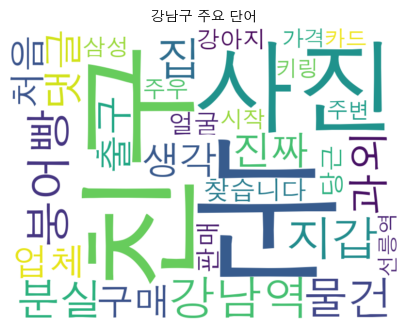

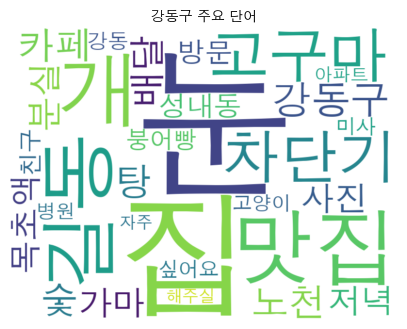

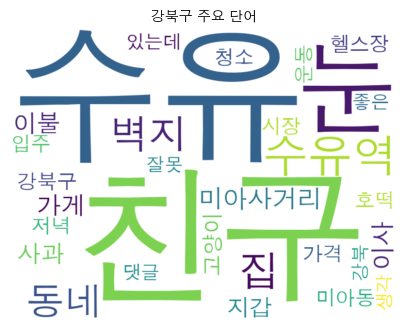

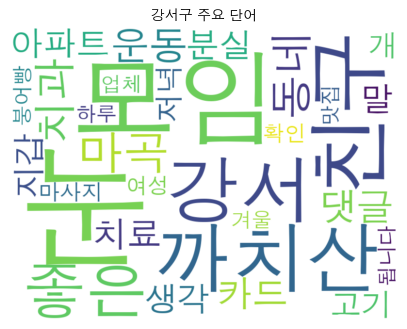

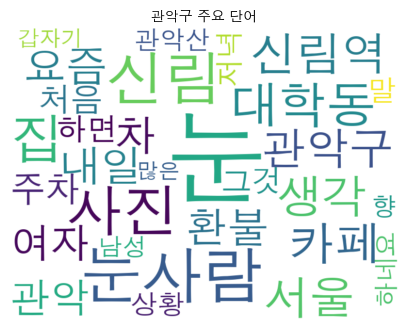

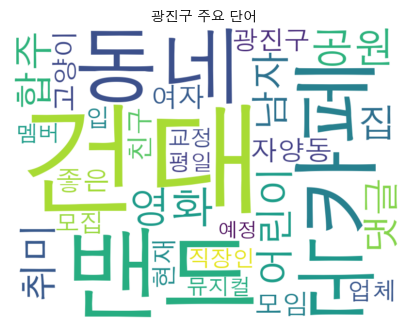

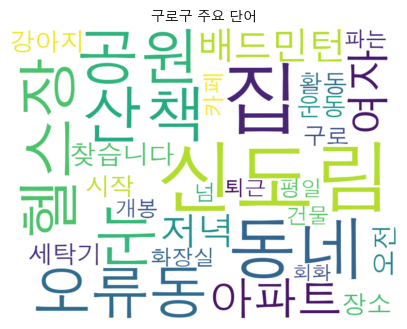

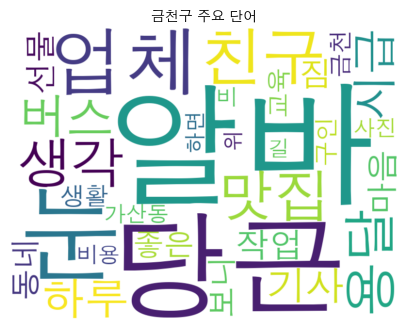

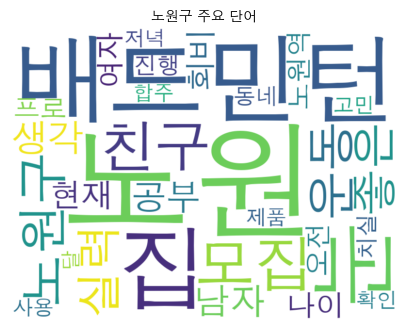

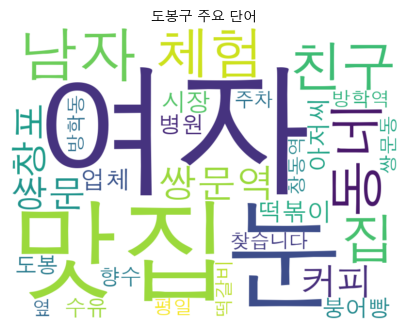

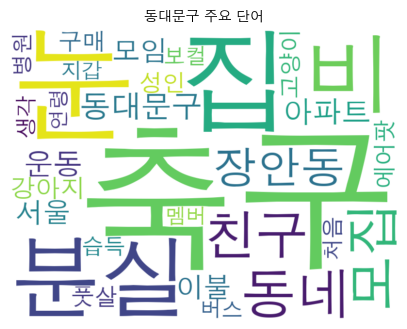

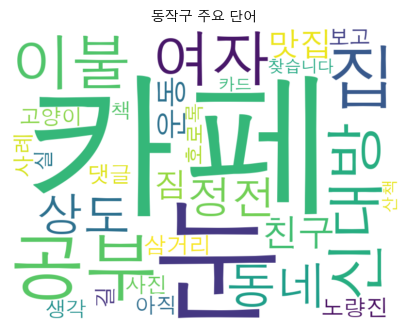

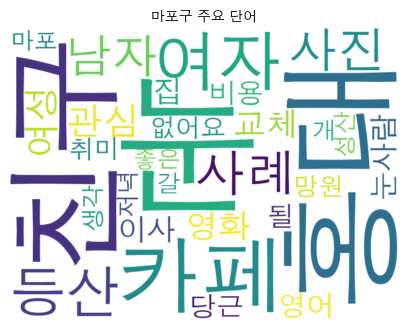

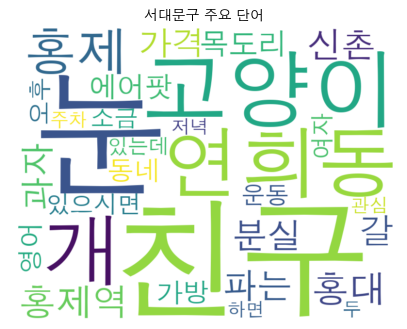

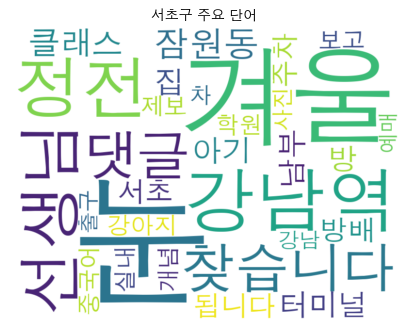

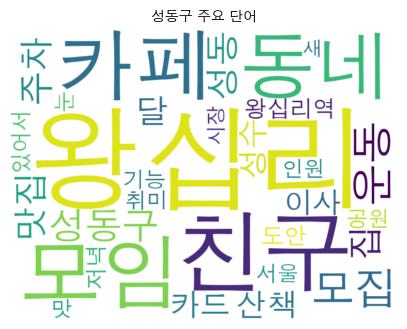

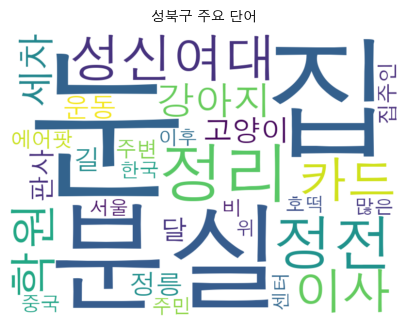

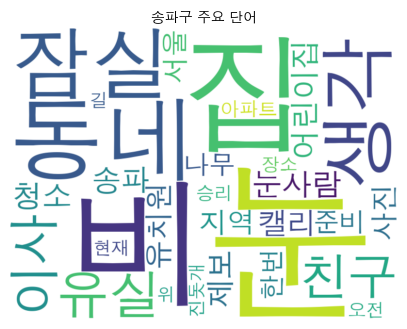

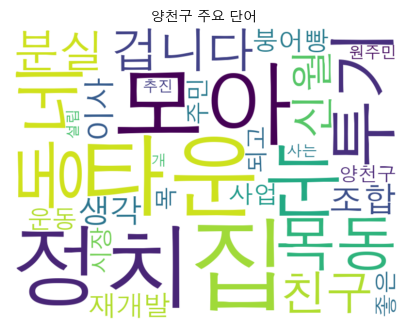

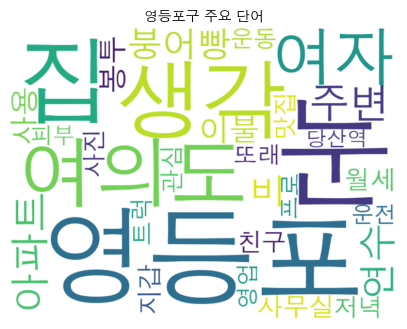

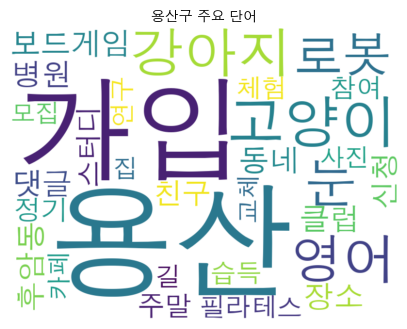

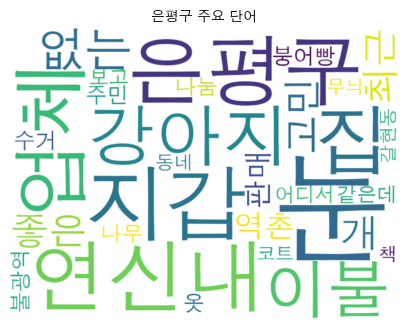

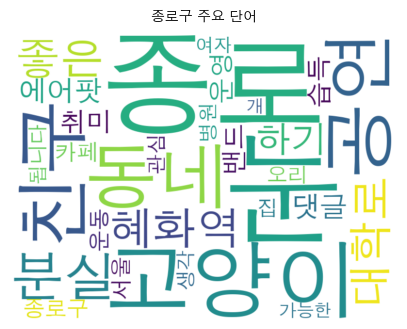

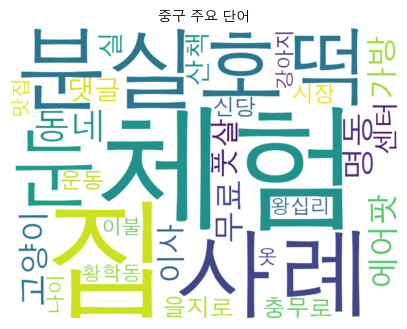

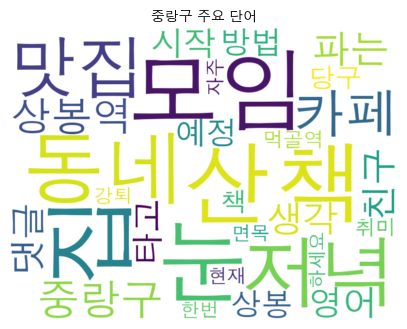

In [161]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ± Ìï®Ïàò
def generate_wordcloud(word_counts, title):
    wordcloud = WordCloud(
        font_path='/Library/Fonts/AppleGothic.ttf',  # MacOS ÏòàÏãú
        background_color='white',
        width=800,
        height=600
    ).generate_from_frequencies(dict(word_counts))
    
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=10)
    plt.axis('off')
    plt.show()

# ÏßÄÏó≠Î≥Ñ ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
for district, keywords in keyword_by_district.items():
    generate_wordcloud(keywords, f"{district} Ï£ºÏöî Îã®Ïñ¥")

'ÌïòÏÑ∏Ïöî'

## Ï£ºÏ†ú Î™®Îç∏ÎßÅ(LDA)

In [224]:
# Î¨∏ÏûêÏó¥ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò (ÌïÑÏöîÌï† Í≤ΩÏö∞)
word['filtered_extracted_article'] = word['filtered_extracted_article'].apply(
    lambda x: x.split(',') if isinstance(x, str) else x
)
word['filtered_extracted_title'] = word['filtered_extracted_title'].apply(
    lambda x: x.split(',') if isinstance(x, str) else x
)
word

title  \
0                              Ï≤´Îàà   
1                    ÌîºÌÅ¨ÎØº Í∏∏ ÏÑúÏπò Îàà ÎπÑ   
2                          ÎààÏò§Î¶¨ Ï∂úÎ™∞   
3     421Î≤à Î≤ÑÏä§ Ïò§Ï†Ñ 9Ïãú Î∞òÏØ§ ÏóêÏñ¥Ìåü 3ÏÑ∏ÎåÄ Î∂ÑÏã§   
4       Í¥ëÌôîÎ¨∏ Í∑ºÏ≤òÏóêÏÑú Î£®Ïù¥ÎπÑÌÜµ Ïπ¥Îìú ÏßÄÍ∞ë Ï£ºÏö∞Ïã†Î∂Ñ!   
...                           ...   
3548                           Ï≤´Îàà   
3549                Ìï∏ÎìúÌè∞ Í∞§Îü≠Ïãú ÌîåÎ¶Ω Î∂ÑÏã§   
3550       5Ìò∏ÌÉùÎ∞∞ÏÇ¨Ïù¥Ï¶à Î∞ïÏä§ ÌïòÎÇòÎßåÏñªÏùÑÏàòÏûàÏùÑÍπåÏöî?   
3551                  ÏÑúÏö∏ ÏÉÅÍ≤Ω 3Í∞úÏõîÏ∞®    
3552                         Îß§Ìä∏Î¶≠Ïä§   

                                                article         current_time  \
0                         Ï≤´Îàà Ìï®Î∞ïÎààÏù¥ Ìéë Ìéë ÎÇ¥Î¶¨Í≥† ÏûàÎÑ§Ïöî Í≤ΩÏπò ÎÅùÎÇ¥ Ï£ºÎÑ§Ïöî  2024-11-27 16:41:30   
1     ÌîºÌÅ¨ÎØº Í∏∏Îßå ÏÑúÏπòÎêòÎäî Í≥≥ ÏïÑÏã§ÍπåÏöî?? Îàà, ÎπÑ ÌîºÌÅ¨ÎØº Î™®ÏúºÍ≥† Ïã∂ÏùÄÎç∞„Öú„Ö† ÎèåÏïÑÎã§ÎÖÄÎ¥êÎèÑ...  2024-11-27 16:41:30   
2     ÎÑ§ Ï†úÍ∞Ä ÎßåÎì§Ïñ¥ÎëêÏóàÏñ¥Ïöî „Öã„Öã„Öã ÏïÑÏπ®Ïóê ÎààÏôîÎã§Í≥†, Í∏∞ÎªêÌïòÎ©∞ ÎààÏò§Î¶¨ ÏßëÍ≤å Ï±ôÍ≤®ÏÑú Ï∂úÍ∑ºÌïò...  2024-11-27 16:41:30   
3     421Î≤à Ïò§Ï†Ñ 9Ïãú20Î∂ÑÏóêÏÑú ~10Ïãú ÏÇ¨Ïù¥Ïóê Ïã†ÏÑ§Îèô - Ï∂©Î¨¥Î°ú - Ïö©ÏÇ∞ÏØ§ Î≤ÑÏä§ ÌÉÄÏã†...  2024-11-27 16:41:30   
4     Î£®Ïù¥ÎπÑÌÜµ Ïπ¥ÎìúÏßÄÍ∞ë Ï£ºÏö∞Ïã† Î∂Ñ Í≥ÑÏã§ÍπåÏöî? Î∞úÍ≤¨ÌïòÏãúÎ©¥ ÎåìÍ∏Ä Ï¢Ä Îã¨ÏïÑÏ£ºÏÑ∏Ïöî üò≠üò≠üò≠ Ïò§ÎûòÏì∞...  2024-11-27 16:41:30   
...                                                 ...                  ...   
3548                  Ï≤´ÎààÏôÄÏÑú ÎßåÎì§ÏóàÎäîÎç∞ Î≥¥Ïã§Î∂ÑÎì§ Î≥¥Í≥† Í∞ÄÏÑ∏Ïöî... Îã§Îì§ ÎààÍ∏∏Ï°∞Ïã¨  2024-11-28 09:15:58   
3549  ÏÜ°Ìåå ÏÇ¨Í±∞Î¶¨ ÌîÑÎùºÏûÑ ÌîºÏãúÎ∞© Ïïû Ïã†Ìò∏Îì± Ï™Ω Ìë∏ÌÑ∞ Í∞§Îü≠Ïãú ÌîåÎ¶Ω 3 Î∂ÑÏã§ÌñàÏäµÎãàÎã§ Î≥¥Ïã† Î∂Ñ...  2024-11-28 09:15:58   
3550  ÍµøÏúåÏóê Í∏∞Î∂ÄÌï¥ÏïºÎêòÎäî Ïò∑Îì§Ïù¥ ÏûàÎäîÎç∞ Î∞ïÏä§Í∞Ä ÏóÜÏñ¥ÏÑúÏöî..„Ö†„Ö† ÌõºÏÜêÎêòÏßÄÎßå ÏïäÏïòÎã§Î©¥ Ïò∑ 1...  2024-11-28 09:15:58   
3551  ÎèôÎÑ§ÏπúÍµ¨ Íµ¨Ìï¥Ïó¨! Ïà† ÌîºÏãúÎ∞© ÎãπÍµ¨ ÎÖ∏ÎûòÎ∞© Îã§ Ï¢ãÏïÑÌï¥Ïöî ÏùºÎÅùÎÇòÍ≥† Í∞ÑÏà†Ï¢ãÏïÑÌïòÍ≥† ÏÇ¥Î©¥ÏÑú ...  2024-11-28 09:15:58   
3552  Îß§Ìä∏Î¶≠Ïä§ Ïñ¥ÎñªÍ≤å Î≤ÑÎ†§ÏïºÎê†ÍπåÏöî? ÏûêÏ∑®ÏÉùÏù∏Îç∞ 3Í∞úÏõîÏ†ïÎèÑ Ïì¥Í±¥Îç∞ ÌïÑÏöîÏóÜÏñ¥ÏÑú Î≤ÑÎ¶¥ÎùºÍ≥† ÌïòÎäî...  2024-11-28 09:16:19   

     like comment district         dong category          update_time  \
0       0       0      Ï¢ÖÎ°úÍµ¨          Ï≤¥Î∂ÄÎèô     ÎèôÎÑ§ÌíçÍ≤Ω  2024-11-27 12:41:30   
1       0       0      Ï¢ÖÎ°úÍµ¨          Ïà≠Ïù∏Îèô       Ï∑®ÎØ∏  2024-11-27 12:41:30   
2       0       0      Ï¢ÖÎ°úÍµ¨         Ï¢ÖÎ°ú1Í∞Ä       Ï∑®ÎØ∏  2024-11-27 11:41:30   
3       0       0      Ï¢ÖÎ°úÍµ¨        Ïà≠Ïù∏Ï†ú2Îèô    Î∂ÑÏã§/Ïã§Ï¢Ö  2024-11-27 10:41:30   
4       0       0      Ï¢ÖÎ°úÍµ¨  Ï¢ÖÎ°ú1.2.3.4Í∞ÄÎèô    Î∂ÑÏã§/Ïã§Ï¢Ö  2024-11-27 10:41:30   
...   ...     ...      ...          ...      ...                  ...   
3548    0       0      ÏÜ°ÌååÍµ¨         Î∞©Ïù¥2Îèô   ÎèôÎÑ§ÏÇ¨Í±¥ÏÇ¨Í≥†  2024-11-28 04:15:58   
3549    0       0      ÏÜ°ÌååÍµ¨         ÏÜ°Ìåå1Îèô    Î∂ÑÏã§/Ïã§Ï¢Ö  2024-11-28 02:15:58   
3550    0       1      ÏÜ°ÌååÍµ¨          Ïû•ÏßÄÎèô       ÏùºÎ∞ò  2024-11-28 02:15:58   
3551    0       0      ÏÜ°ÌååÍµ¨         Î∞©Ïù¥2Îèô     ÎèôÎÑ§ÏπúÍµ¨  2024-11-28 01:15:58   
3552    0       0      Í∞ïÎèôÍµ¨          ÏïîÏÇ¨Îèô    ÏÉùÌôú/Ìé∏Ïùò  2024-11-28 00:16:19   

                    cleaned_title  \
0                              Ï≤´Îàà   
1                    ÌîºÌÅ¨ÎØº Í∏∏ ÏÑúÏπò Îàà ÎπÑ   
2                          ÎààÏò§Î¶¨ Ï∂úÎ™∞   
3     421Î≤à Î≤ÑÏä§ Ïò§Ï†Ñ 9Ïãú Î∞òÏØ§ ÏóêÏñ¥Ìåü 3ÏÑ∏ÎåÄ Î∂ÑÏã§   
4        Í¥ëÌôîÎ¨∏ Í∑ºÏ≤òÏóêÏÑú Î£®Ïù¥ÎπÑÌÜµ Ïπ¥Îìú ÏßÄÍ∞ë Ï£ºÏö∞Ïã†Î∂Ñ   
...                           ...   
3548                           Ï≤´Îàà   
3549                Ìï∏ÎìúÌè∞ Í∞§Îü≠Ïãú ÌîåÎ¶Ω Î∂ÑÏã§   
3550        5Ìò∏ÌÉùÎ∞∞ÏÇ¨Ïù¥Ï¶à Î∞ïÏä§ ÌïòÎÇòÎßåÏñªÏùÑÏàòÏûàÏùÑÍπåÏöî   
3551                   ÏÑúÏö∏ ÏÉÅÍ≤Ω 3Í∞úÏõîÏ∞®   
3552                         Îß§Ìä∏Î¶≠Ïä§   

                                        cleaned_article  \
0                         Ï≤´Îàà Ìï®Î∞ïÎààÏù¥ Ìéë Ìéë ÎÇ¥Î¶¨Í≥† Ïû

In [228]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel

district_topics = {}

for district, group in word.groupby('district'):
    # ÏßÄÏó≠Î≥Ñ Î¨∏ÏÑú ÏÉùÏÑ±
    documents = group['filtered_extracted_article'].tolist()
    
    # Îã®Ïñ¥ ÏÇ¨Ï†Ñ Î∞è Îã®Ïñ¥-Î¨∏ÏÑú ÌñâÎ†¨ ÏÉùÏÑ±
    dictionary = corpora.Dictionary(documents)
    dictionary.filter_extremes(no_below=6, no_above=0.3)  # 5Í∞ú Ïù¥ÏÉÅ Îì±Ïû•ÌïòÎäî Îã®Ïñ¥ Ï∂îÏ∂ú , Ï†ÑÏ≤¥ 30Ìçº Ïù¥ÏÉÅ Îì±Ïû• Ï†úÍ±∞ 
    corpus = [dictionary.doc2bow(doc) for doc in documents]
    
    # LDA Î™®Îç∏ ÏÉùÏÑ±
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=6, random_state=42, passes=10)
    
    # ÏßÄÏó≠Î≥Ñ Í≤∞Í≥º Ï†ÄÏû•
    district_topics[district] = lda_model

    # Ï£ºÏ†úÎ≥Ñ Îã®Ïñ¥ Ï∂úÎ†•
    print(f"=== ÏßÄÏó≠: {district} ===")
    for idx, topic in lda_model.print_topics(-1):
        print(f"Ï£ºÏ†ú {idx}: {topic}")
    print()

=== ÏßÄÏó≠: Í∞ïÎÇ®Íµ¨ ===
Ï£ºÏ†ú 0: 0.609*"Îàà" + 0.222*"Í∞ïÎÇ®Ïó≠" + 0.093*"ÏÇ¨ÏßÑ" + 0.007*"ÏßÄÍ∞ë" + 0.007*"ÏßÑÏßú" + 0.007*"Ï≤òÏùå" + 0.006*"Î¨ºÍ±¥" + 0.006*"ÎåìÍ∏Ä" + 0.006*"Î∞úÍ≤¨" + 0.006*"Ï¢ãÏùÄ"
Ï£ºÏ†ú 1: 0.399*"ÏÇ¨ÏßÑ" + 0.334*"Î∞úÍ≤¨" + 0.093*"ÎåìÍ∏Ä" + 0.063*"Ï∂úÍµ¨" + 0.015*"Îàà" + 0.013*"Ïßë" + 0.010*"ÏßÑÏßú" + 0.010*"Ï¢ãÏùÄ" + 0.009*"ÏÉùÍ∞Å" + 0.009*"Î¨ºÍ±¥"
Ï£ºÏ†ú 2: 0.359*"ÏßÑÏßú" + 0.253*"Ï¢ãÏùÄ" + 0.147*"Ï∂úÍµ¨" + 0.139*"Ï≤òÏùå" + 0.034*"ÏÇ¨ÏßÑ" + 0.013*"Îàà" + 0.007*"Í∞ïÎÇ®Ïó≠" + 0.006*"ÏÉùÍ∞Å" + 0.006*"Ïßë" + 0.006*"ÎåìÍ∏Ä"
Ï£ºÏ†ú 3: 0.494*"Î¨ºÍ±¥" + 0.106*"Ï≤òÏùå" + 0.106*"Ï∂úÍµ¨" + 0.105*"Íµ¨Îß§" + 0.057*"ÏßÄÍ∞ë" + 0.057*"Îàà" + 0.010*"Î∞úÍ≤¨" + 0.009*"ÎåìÍ∏Ä" + 0.009*"ÏßÑÏßú" + 0.008*"ÏÇ¨ÏßÑ"
Ï£ºÏ†ú 4: 0.287*"ÏÉùÍ∞Å" + 0.257*"Ïßë" + 0.202*"ÏßÄÍ∞ë" + 0.185*"ÎåìÍ∏Ä" + 0.014*"ÏãúÏûë" + 0.011*"Ï≤òÏùå" + 0.005*"Ï∂úÍµ¨" + 0.005*"Í∞ïÎÇ®Ïó≠" + 0.005*"Î∞úÍ≤¨" + 0.005*"ÏÇ¨ÏßÑ"
Ï£ºÏ†ú 5: 0.414*"ÏãúÏûë" + 0.326*"Íµ¨Îß§" + 0.066*"ÎåìÍ∏Ä" + 0.062*"Ï≤òÏùå" + 0.043*"ÏÇ¨ÏßÑ" + 0

[(0,
  '0.478*"Î™®ÏûÑ" + 0.277*"Îàà" + 0.105*"ÏÉùÍ∞Å" + 0.094*"ÎåìÍ∏Ä" + 0.006*"Ï†ÄÎÖÅ" + 0.006*"ÌÉÄÍ≥†" + 0.006*"ÏòàÏ†ï" + 0.006*"ÌïúÎ≤à" + 0.006*"Ïßë" + 0.006*"ÌååÎäî"'),
 (1,
  '0.242*"ÏòàÏ†ï" + 0.242*"Ï†ÄÎÖÅ" + 0.209*"ÌïúÎ≤à" + 0.175*"ÌååÎäî" + 0.052*"ÎåìÍ∏Ä" + 0.042*"ÏÉùÍ∞Å" + 0.008*"Î™®ÏûÑ" + 0.006*"ÎèôÎÑ§" + 0.006*"ÌÉÄÍ≥†" + 0.006*"Ïßë"'),
 (2,
  '0.468*"ÎèôÎÑ§" + 0.391*"ÏÉùÍ∞Å" + 0.024*"ÏãúÏûë" + 0.014*"ÎåìÍ∏Ä" + 0.013*"Î™®ÏûÑ" + 0.013*"Ï†ÄÎÖÅ" + 0.013*"ÌïúÎ≤à" + 0.013*"ÏòàÏ†ï" + 0.013*"Ïßë" + 0.013*"ÌååÎäî"'),
 (3,
  '0.708*"ÏãúÏûë" + 0.118*"Îàà" + 0.019*"Ïßë" + 0.018*"ÏòàÏ†ï" + 0.018*"ÌïúÎ≤à" + 0.018*"ÌÉÄÍ≥†" + 0.017*"ÏÉùÍ∞Å" + 0.017*"ÎèôÎÑ§" + 0.017*"ÎåìÍ∏Ä" + 0.017*"ÌååÎäî"'),
 (4,
  '0.547*"ÌÉÄÍ≥†" + 0.318*"ÎåìÍ∏Ä" + 0.016*"ÏÉùÍ∞Å" + 0.016*"Ïßë" + 0.013*"Îàà" + 0.013*"ÏòàÏ†ï" + 0.013*"ÌïúÎ≤à" + 0.013*"ÎèôÎÑ§" + 0.013*"ÌååÎäî" + 0.013*"Ï†ÄÎÖÅ"'),
 (5,
  '0.672*"Ïßë" + 0.103*"ÎèôÎÑ§" + 0.057*"Ï†ÄÎÖÅ" + 0.056*"ÌååÎäî" + 0.056*"ÎåìÍ∏Ä" + 0.009*"ÏãúÏûë" + 0.009*"Î™®ÏûÑ" + 0.008

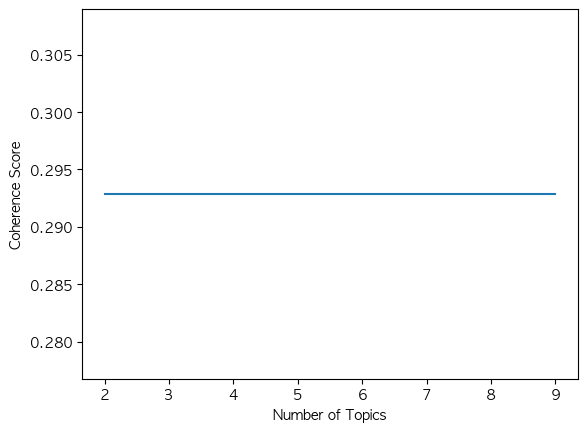

In [238]:
from gensim.models.coherencemodel import CoherenceModel

def find_optimal_topics(dictionary, corpus, texts, start=2, end=10):
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, end):
        # LDA Î™®Îç∏ ÏÉùÏÑ±
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=5, random_state=42)
        model_list.append(model)
        
        # Coherence Ï†êÏàò Í≥ÑÏÇ∞
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    
    return model_list, coherence_values

# Ïã§Ìñâ
model_list, coherence_values = find_optimal_topics(dictionary, corpus, word['filtered_extracted_article'], start=2, end=10)

# Coherence Score ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.show()

IndexError: index 29 is out of bounds for axis 1 with size 29

In [245]:
word.loc[word['title'].str.contains('Í∞ú')]

title  \
25                Ï¢ÖÎ°ú Ïù¥ÏÇ¨Ïßê Î∞ïÏä§ 10Í∞ú ÎåÄÏó¨ Í∞ÄÎä•ÌïúÍ≥≥ ÏûàÏùÑÍπåÏöî?   
190                            Ïö©Îã¨Í∏∞ÏÇ¨Îãò ÏÜåÍ∞ú Î∂ÄÌÉÅÎìúÎ†§Ïöî   
211                           LED Îì±Í∏∞Íµ¨ ÍµêÏ≤¥ (1Í∞ú)   
213                        Î≤ΩÏóê ÏΩòÏÑºÌä∏ 2Í∞ú ÍµêÏ≤¥Ìï¥Ï£ºÏã§Î∂ÑÏöî    
221                   ÎßåÎ¶¨ÎèôÍ≥†Í∞úÎÇò ÏàôÎåÄÏóê Ìò∏Îñ° ÌååÎäî Í≥≥ ÏûàÎÇòÏöî?   
...                                       ...   
3271                                 Í≥µÏù∏Ï§ëÍ∞úÏÇ¨ Ïù∏Í∞ï   
3457                             Ïù¥Í±¥ ÏïÑÏû¨Í∞úÍ∑∏ ÏïÑÎãôÎãàÎã§   
3478  Ïó¨Í∏∞Ïöî Ïó¨Í∏∞Ïöî~!!! ÎåÄÎ∞îÎäò Îú®Í∞úÏßà Í≥†ÏàòÎãòÎì§üòç~ ÎèÑÏôÄ Ï£ºÏÑ∏Ïöî~~!! ü•π   
3509                       Îú®Í∞úÏßà ÏΩîÎ∞îÎäò Î∞∞Ïö∞Í≥† Ïã∂Ïñ¥Ïöî!„Ö†„Ö†   
3551                              ÏÑúÏö∏ ÏÉÅÍ≤Ω 3Í∞úÏõîÏ∞®    

                                                article         current_time  \
25                          Ï¢ÖÎ°ú Ïù¥ÏÇ¨Ïßê Î∞ïÏä§ 10Í∞ú ÎåÄÏó¨ Í∞ÄÎä•ÌïúÍ≥≥ ÏûàÏùÑÍπåÏöî?  2024-11-27 16:41:30   
190                                 Ïö©ÏÇ∞Íµ¨ Ïö©Îã¨Í∏∞ÏÇ¨Îãò ÏÜåÍ∞ú Î∂ÄÌÉÅÎìúÎ¶ΩÎãàÎã§  2024-11-27 16:41:51   
211   ÌòÑÏû¨ ÏûàÎäî ÌòïÍ¥ëÎì±Ïù¥ Í≥ÑÏÜç ÏÉàÍ≤ÉÏúºÎ°ú Í∞àÏïÑÎÅºÏõåÎèÑ ÍπúÎ∞ïÏó¨ÏÑú LED Îì±Í∏∞Íµ¨Î°ú ÍµêÏ≤¥ÌïòÎ†§Í≥† Ìï©...  2024-11-27 16:42:12   
213   Ï§ëÎ¶ºÎèô ÏïΩÌòÑÏÑ±Îãπ Í∑ºÏ≤òÏûÖÎãàÎã§ ÏûëÏùÄÎ∞© Î≤ΩÎ©¥Ïóê ÏΩòÏÑºÌä∏ 2Í∞ú ÍµêÏ≤¥Ìï¥Ï£ºÏã§Î∂Ñ Í≥ÑÏã§ÍπåÏöî ÏãúÍ∞ÑÏùÄ ...  2024-11-27 16:42:12   
221                                    Í∞ëÏûêÍ∏∞ Ìò∏Îñ°Ïù¥ ÎÑàÎ¨¥ Î®πÍ≥†Ïã∂ÎÑ§Ïö©  2024-11-27 16:42:12   
...                                                 ...                  ...   
3271  25ÎÖÑÎèÑ Ïù∏Í∞ï ÎÅäÏúºÏã†Î∂ÑÏù¥ÎÇò ÏïûÏúºÎ°ú Í≥ÑÌöçÏûàÏúºÏã†Î∂ÑÏ§ëÏóê ÏùºÏ†ïÍ∏àÏï° ÎÇòÎà†ÏÑú Í∞ôÏù¥ Í≥µÏú†ÌïòÏã§Î∂Ñ ...  2024-11-28 01:01:26   
3457  Ï†ÄÎäî Ïñ¥Ï∞åÎ≥¥Î©¥ ÎßπÌïú ÏÇ¨Îûå Í∞ôÍ∏∞ÎèÑ Ìï©ÎãàÎã§ ÏïÑÎãà Ïñ¥Ï©ú Í∑∏Îü¥Ïàò ÏûàÎã¥ ÌïòÎ©¥ÏÑú ÌòÄÎ•º ÎÅåÎÅå Ï∞∞...  2024-11-28 09:13:05   
3478  ÏßÄÍ∏à ÎåÄÎ∞îÎäò Îú®Í∞úÏßà Ïó∞ÏäµÌïòÎäî Ï§ëÏù∏Îç∞Ïöî. Ïïû Îí∑Î©¥ Ï∞çÏñ¥ÏÑú Ïò¨Î¶∞Í±∞ Î¥êÏ£ºÏãúÍ≥† Ï°∞Ïñ∏ Î∂ÄÌÉÅÎìú...  2024-11-28 09:14:10   
3509  Ï∂îÏõåÏßÄÎãà Îú®Í∞úÏßàÏù¥ÎÇò ÏΩîÎ∞îÎäòÏù¥ Î∞∞Ïö∞Í≥† Ïã∂ÏùÄÎç∞ Ïñ¥ÎîîÏÑú Î∞∞ÏõåÏïºÌï†ÏßÄ „Ö†„Ö† ÏïåÎ†§Ï£ºÏÑ∏Ïöî Í≥†ÏàòÎãò...  2024-11-28 09:14:53   
3551  ÎèôÎÑ§ÏπúÍµ¨ Íµ¨Ìï¥Ïó¨! Ïà† ÌîºÏãúÎ∞© ÎãπÍµ¨ ÎÖ∏ÎûòÎ∞© Îã§ Ï¢ãÏïÑÌï¥Ïöî ÏùºÎÅùÎÇòÍ≥† Í∞ÑÏà†Ï¢ãÏïÑÌïòÍ≥† ÏÇ¥Î©¥ÏÑú ...  2024-11-28 09:15:58   

     like comment district   dong category          update_time  \
25      0       2      Ï¢ÖÎ°úÍµ¨  Ï≤≠Ïö¥Ìö®ÏûêÎèô    ÏÉùÌôú/Ìé∏Ïùò  2024-11-25 16:41:30   
190     1       4       Ï§ëÍµ¨    ÏÇºÍ∞ÅÎèô    Ïù¥ÏÇ¨/ÏãúÍ≥µ  2024-11-22 16:41:51   
211     0       0      Ïö©ÏÇ∞Íµ¨   Ïù¥ÌÉúÏõêÎèô    Ïù¥ÏÇ¨/ÏãúÍ≥µ  2024-11-27 13:42:12   
213     0       2      Ïö©ÏÇ∞Íµ¨    ÎèôÏûêÎèô    ÏÉùÌôú/Ìé∏Ïùò  2024-11-27 12:42:12   
221     0       4      Ïö©ÏÇ∞Íµ¨  Ï≤≠ÌååÎèô1Í∞Ä       ÎßõÏßë  2024-11-27 01:42:12   
...   ...     ...      ...    ...      ...                  ...   
3271    0       0      Í∞ïÎÇ®Íµ¨   Ïó≠ÏÇº1Îèô    ÏÉùÌôú/Ìé∏Ïùò  2024-11-27 20:01:26   
3457    0       0      Í∞ïÏÑúÍµ¨  Î∞©ÌôîÏ†ú1Îèô     ÎèôÎÑ§ÌíçÍ≤Ω  2024-11-28 03:13:05   
3478    1       5     ÏòÅÎì±Ìè¨Íµ¨  ÏòÅÎì±Ìè¨Î≥∏Îèô       Ï∑®ÎØ∏  2024-11-28 03:14:10   
3509    0       1      Í¥ÄÏïÖÍµ¨    Ïã†Î¶ºÎèô       Ï∑®ÎØ∏  2024-11-28 01:14:53   
3551    0       0      ÏÜ°ÌååÍµ¨   Î∞©Ïù¥2Îèô     ÎèôÎÑ§ÏπúÍµ¨  2024-11-28 01:15:58   

                    cleaned_title  \
25     Ï¢ÖÎ°ú Ïù¥ÏÇ¨Ïßê Î∞ïÏä§ 10Í∞ú ÎåÄÏó¨ Í∞ÄÎä•ÌïúÍ≥≥ ÏûàÏùÑÍπåÏöî   
190                Ïö©Îã¨Í∏∞ÏÇ¨Îãò ÏÜåÍ∞ú Î∂ÄÌÉÅÎìúÎ†§Ïöî   
211                 LED Îì±Í∏∞Íµ¨ ÍµêÏ≤¥ 1Í∞ú   
213             Î≤ΩÏóê ÏΩòÏÑºÌä∏ 2Í∞ú ÍµêÏ≤¥Ìï¥Ï£ºÏã§Î∂ÑÏöî   
221        ÎßåÎ¶¨ÎèôÍ≥†Í∞úÎÇò ÏàôÎåÄÏóê Ìò∏Îñ° ÌååÎäî Í≥≥ ÏûàÎÇòÏöî   
...                           ...   
3271                     Í≥µÏù∏Ï§ëÍ∞úÏÇ¨ Ïù∏Í∞ï   
3457                 Ïù¥Í±¥ ÏïÑÏû¨Í∞úÍ∑∏ ÏïÑÎãôÎãàÎã§   
3478  Ïó¨Í∏∞Ïöî Ïó¨Í∏∞Ïöî ÎåÄÎ∞îÎäò Îú®Í∞úÏßà Í≥†ÏàòÎãòÎì§ ÎèÑÏôÄ Ï£ºÏÑ∏Ïöî   
3509            Îú®Í∞úÏßà ÏΩîÎ∞îÎäò Î∞∞Ïö∞Í≥† Ïã∂Ïñ¥Ïöî„Ö†„Ö†   
3551    

<!-- Î∂ÑÏÑù Ï£ºÏ†ú	Ï†ÅÌï© Í∏∞Î≤ï	ÌôúÏö© ÏÇ¨Î°Ä
ÏßÄÏó≠Î≥Ñ Ï£ºÏöî Í¥ÄÏã¨ÏÇ¨	Îã®Ïñ¥ ÎπàÎèÑ, TF-IDF, Ï£ºÏ†ú Î™®Îç∏ÎßÅ	ÏßÄÏó≠ÎßàÎã§ Ïù∏Í∏∞ ÏûàÎäî ÌÇ§ÏõåÎìú/Ï£ºÏ†ú ÏãùÎ≥Ñ
Í∞êÏ†ï Î∂ÑÏÑù	Í∞êÏ†ï ÏÇ¨Ï†Ñ Í∏∞Î∞ò Î∂ÑÏÑù, Îî•Îü¨Îãù Í∏∞Î∞ò Î∂ÑÏÑù	Í∏çÏ†ï/Î∂ÄÏ†ï ÎπÑÏú®Î°ú ÏßÄÏó≠ Î∂ÑÏúÑÍ∏∞ ÌååÏïÖ
Í¥ëÍ≥† ÌÉÄÍ≤üÌåÖ	N-gram, Word2Vec, ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ, ÌîÑÎ°úÌååÏùºÎßÅ	ÎßûÏ∂§Ìòï Í¥ëÍ≥† Î¨∏Íµ¨ ÏÉùÏÑ± Î∞è Í¥ÄÏã¨ÏÇ¨ Í∑∏Î£π ÌÉÄÍ≤üÌåÖ
Ìä∏Î†åÎìú Î∂ÑÏÑù	ÏãúÍ∞Ñ Í∏∞Î∞ò ÎπàÎèÑ Î∂ÑÏÑù, N-gram, ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù	Í≥ÑÏ†à/Ïù¥Î≤§Ìä∏ Í∏∞Î∞ò ÌÇ§ÏõåÎìú Ï∂îÏ†Å Î∞è ÏòàÏ∏° -->